In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [235]:
spot_data = pd.read_csv('spotify-2023.csv', encoding='latin1') #Load the DataFrame. use encoding 'latin1' because UTF-8 shows an error that says "UnicodeDecodeError".
spot_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


# Overview Dataset

In [238]:
data_row = len(spot_data) #Count the Rows of the DataFrame
data_row

953

In [240]:
data_col = len(spot_data.columns) #Count the Columns of the DataFrame
data_col

24

In [242]:
spot_data.dtypes #look for the data types of each columns

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [244]:
spot_data['streams'].dtypes #to find the problem in finding the mean, median and standard deviation

dtype('O')

In [246]:
spot_data['streams'] = pd.to_numeric(spot_data['streams'], errors = 'coerce') #Convert the Data from Object to Float.
spot_data['streams'].dtypes

dtype('float64')

# Basic Descriptive Statistics

In [249]:
#Find the Mean
data_mean = spot_data['streams'].mean()
print("Mean:", data_mean)

# Find the Median
data_mid = spot_data['streams'].median()
print("Median:", data_mid)

# Find the Standard Deviation
data_std = spot_data['streams'].std()
print("Standard Deviation:", data_std)

Mean: 514137424.93907565
Median: 290530915.0
Standard Deviation: 566856949.0388832


In [251]:
freq_release = spot_data['released_year'].value_counts()
freq_release #Find the Frequency for Each year.

released_year
2022    402
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

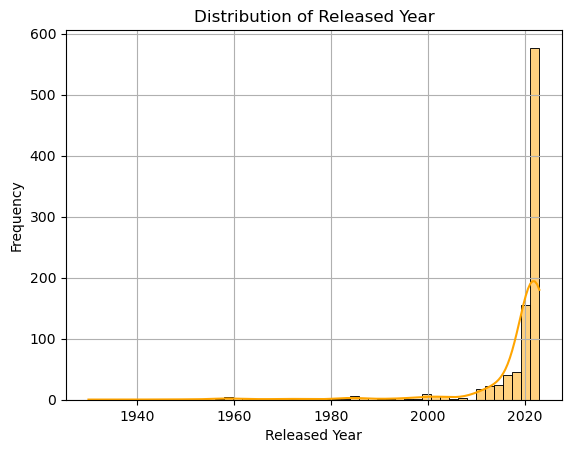

In [253]:
sns.histplot(spot_data['released_year'], color='orange', bins = 50, kde = True) #Generate the histogram for the released year using Seaborn
#Use matplot to modify the graph and show the graph
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [254]:
freq_artist = spot_data['artist_count'].value_counts() # Generate the Data for the Artist count
freq_artist

artist_count
1    587
2    254
3     85
4     15
5      5
6      3
8      2
7      2
Name: count, dtype: int64

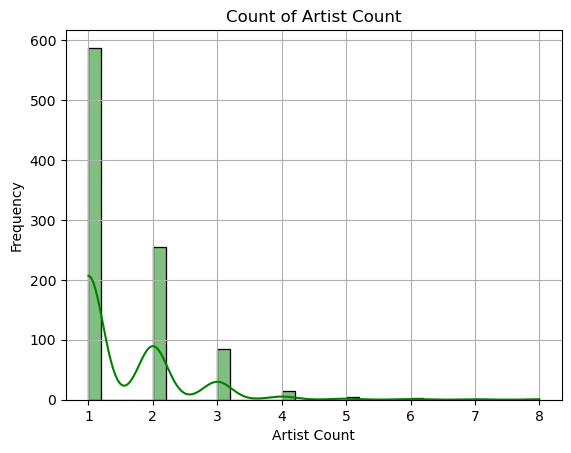

In [257]:
sns.histplot(spot_data['artist_count'], color='green', kde = True) #Generate the histogram for the artist count using Seaborn
#Use matplot to modify the graph and show the graph
plt.title('Count of Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Top Performers

In [260]:
top_five_streams = spot_data.sort_values(by = 'streams').tail(6).iloc[::-1].reset_index()
#in the column 'streams' I sorted the value, assumed that "NaN" is not counted
#and put the order of tail in descending order then reset the index before removing the "NaN"
print(top_five_streams[['track_name','artist(s)_name', 'streams']].dropna())

                                      track_name         artist(s)_name  \
1                                Blinding Lights             The Weeknd   
2                                   Shape of You             Ed Sheeran   
3                              Someone You Loved          Lewis Capaldi   
4                                   Dance Monkey            Tones and I   
5  Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

        streams  
1  3.703895e+09  
2  3.562544e+09  
3  2.887242e+09  
4  2.864792e+09  
5  2.808097e+09  


In [262]:
top_five_artist = spot_data['artist(s)_name'].value_counts()
top_five_artist.head()

artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64

# Temporal Trends

In [265]:
release_data = spot_data.groupby('released_year').size().reset_index(name='track_count') #check the ff. data and output it
release_data

,released_year,track_count
0,1930,1
1,1942,1
2,1946,1
3,1950,1
4,1952,1
5,1957,2
6,1958,3
7,1959,2
8,1963,3
9,1968,1


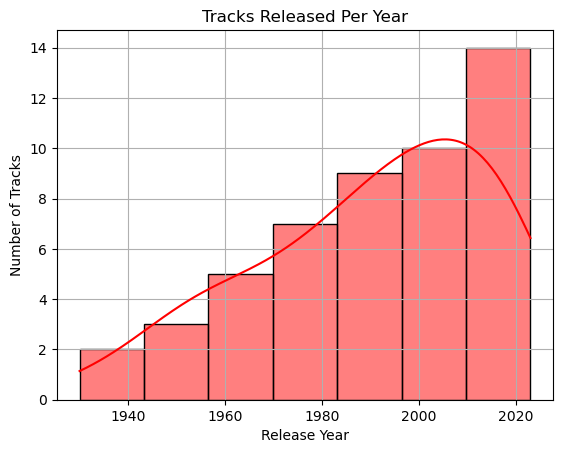

In [267]:
sns.histplot(x='released_year', data = release_data, color='red', kde = True)#Generate a Line graph with the month on the x-axis
#number of tracks in the y-axis
plt.title('Tracks Released Per Year')#title of the graph
plt.xlabel('Release Year')#label in the x-axis
plt.ylabel('Number of Tracks')#label in the y-axis
plt.grid(True) #add a grid
plt.show() #print the graph

In [268]:
month_of_release = spot_data.groupby('released_month').size().reset_index(name='track_count') #check the ff. data and output it
month_of_release

,released_month,track_count
0,1,134
1,2,61
2,3,86
3,4,66
4,5,128
5,6,86
6,7,62
7,8,46
8,9,56
9,10,73


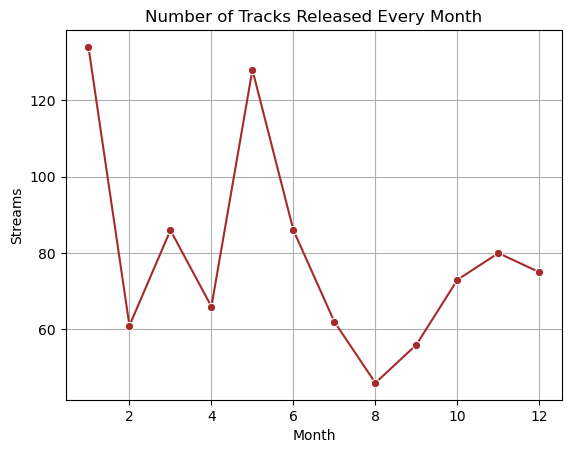

In [271]:
sns.lineplot(x='released_month',y='track_count', data = month_of_release, color='brown', marker = 'o') #Generate a Line graph with the month on the x-axis
#number of tracks in the y-axis
plt.title('Number of Tracks Released Every Month') #title of the graph
plt.xlabel('Month') #label in the x-axis
plt.ylabel('Streams') #label in the y-axis
plt.grid(True) #add a grid
plt.show() #print the graph

#  Genre and Music Characteristics

In [274]:
stream_and_bpm = spot_data[['bpm', 'streams']] #look for the values of BPM and Streams
stream_and_bpm.dropna() #print for checking

,bpm,streams
0,125,141381703.0
1,92,133716286.0
2,138,140003974.0
3,170,800840817.0
4,144,303236322.0
...,...,...
948,144,91473363.0
949,166,121871870.0
950,92,73513683.0
951,97,133895612.0


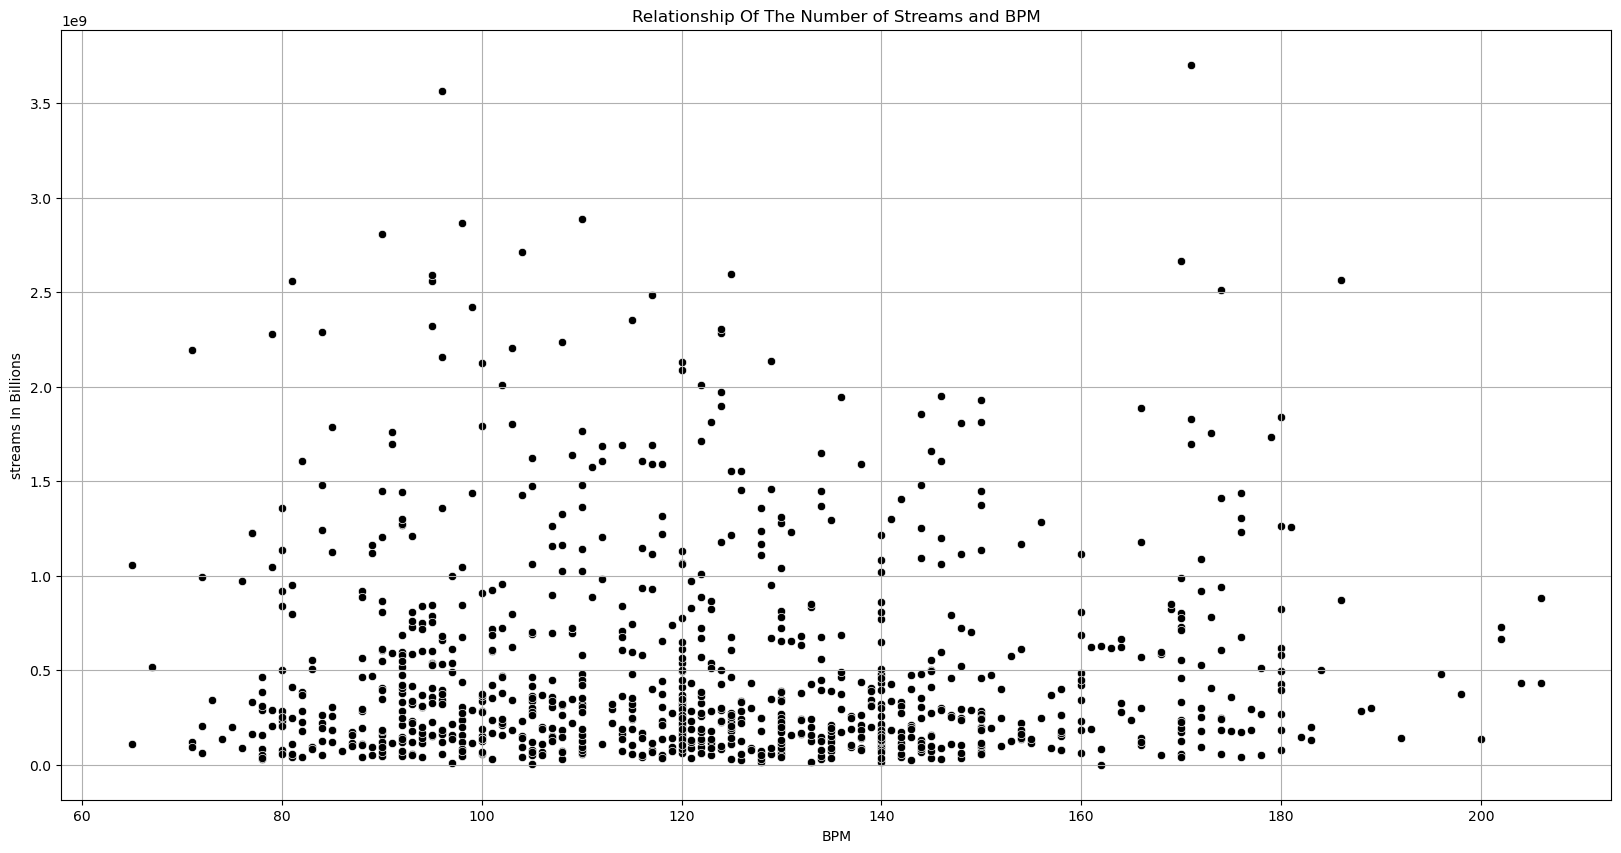

In [276]:
plt.figure(figsize=(20,10))#Adjust the size of the graph
sns.scatterplot(x='bpm',y='streams', data = stream_and_bpm, color='black', marker = 'o') #Generate a Line graph with the month on the x-axis
#number of tracks in the y-axis
plt.title('Relationship Of The Number of Streams and BPM') #title of the graph
plt.xlabel('BPM') #label in the x-axis
plt.ylabel('streams In Billions') #label in the y-axis
plt.grid(True) #add a grid
plt.show() #print the graph

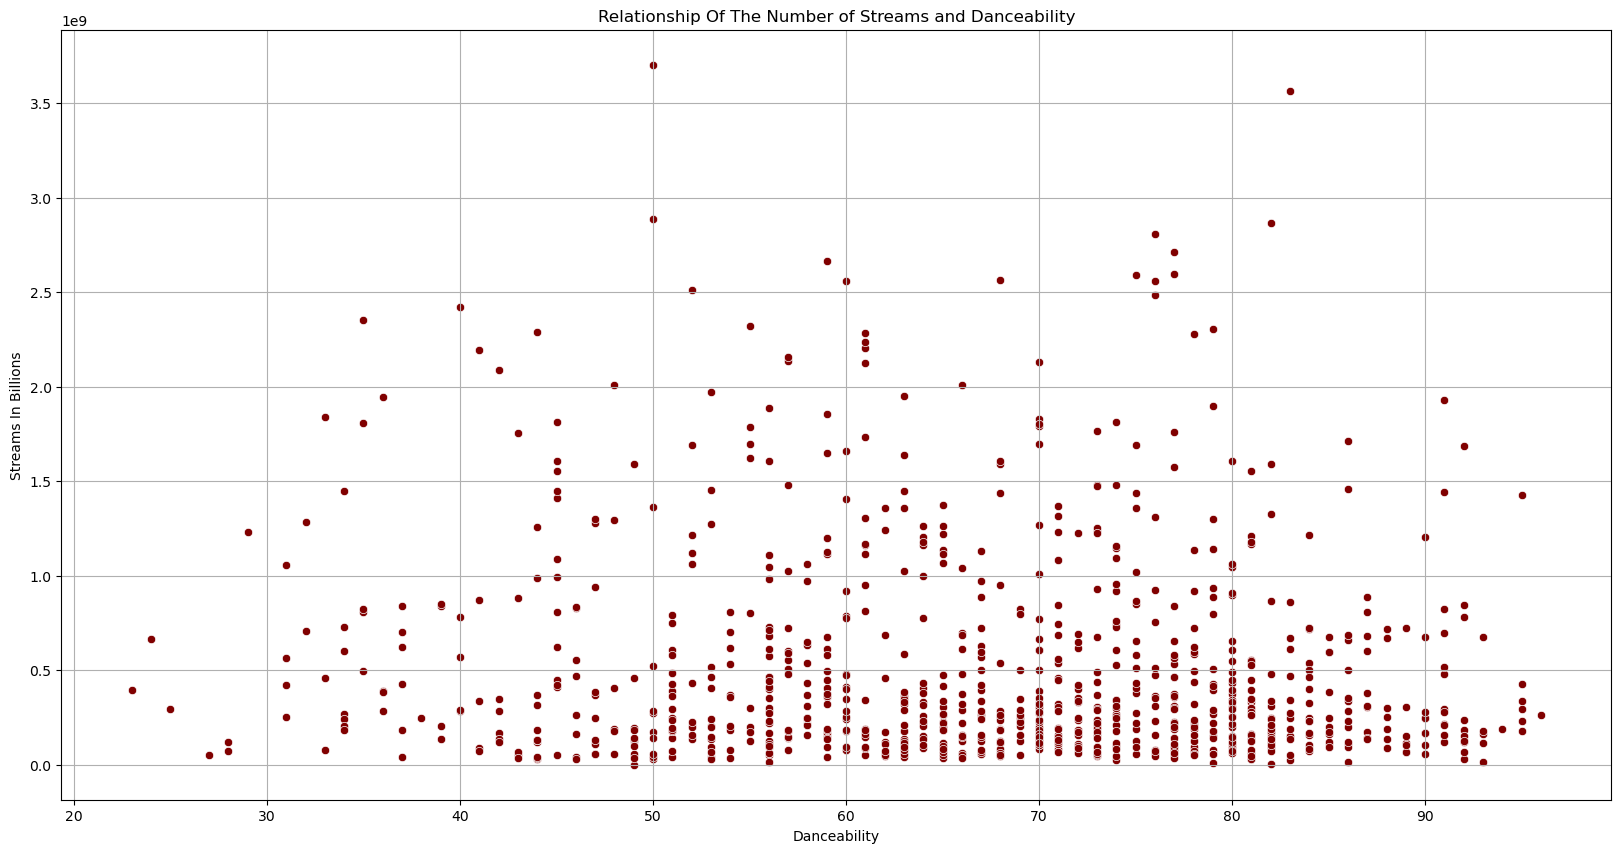

In [277]:
plt.figure(figsize=(20,10))#Adjust the size of the graph
sns.scatterplot(x='danceability_%',y='streams', data = spot_data, color='maroon', marker = 'o') #Generate a Line graph with the month on the x-axis
#number of tracks in the y-axis
plt.title('Relationship Of The Number of Streams and Danceability') #title of the graph
plt.xlabel('Danceability') #label in the x-axis
plt.ylabel('Streams In Billions') #label in the y-axis
plt.grid(True) #add a grid
plt.show() #print the graph

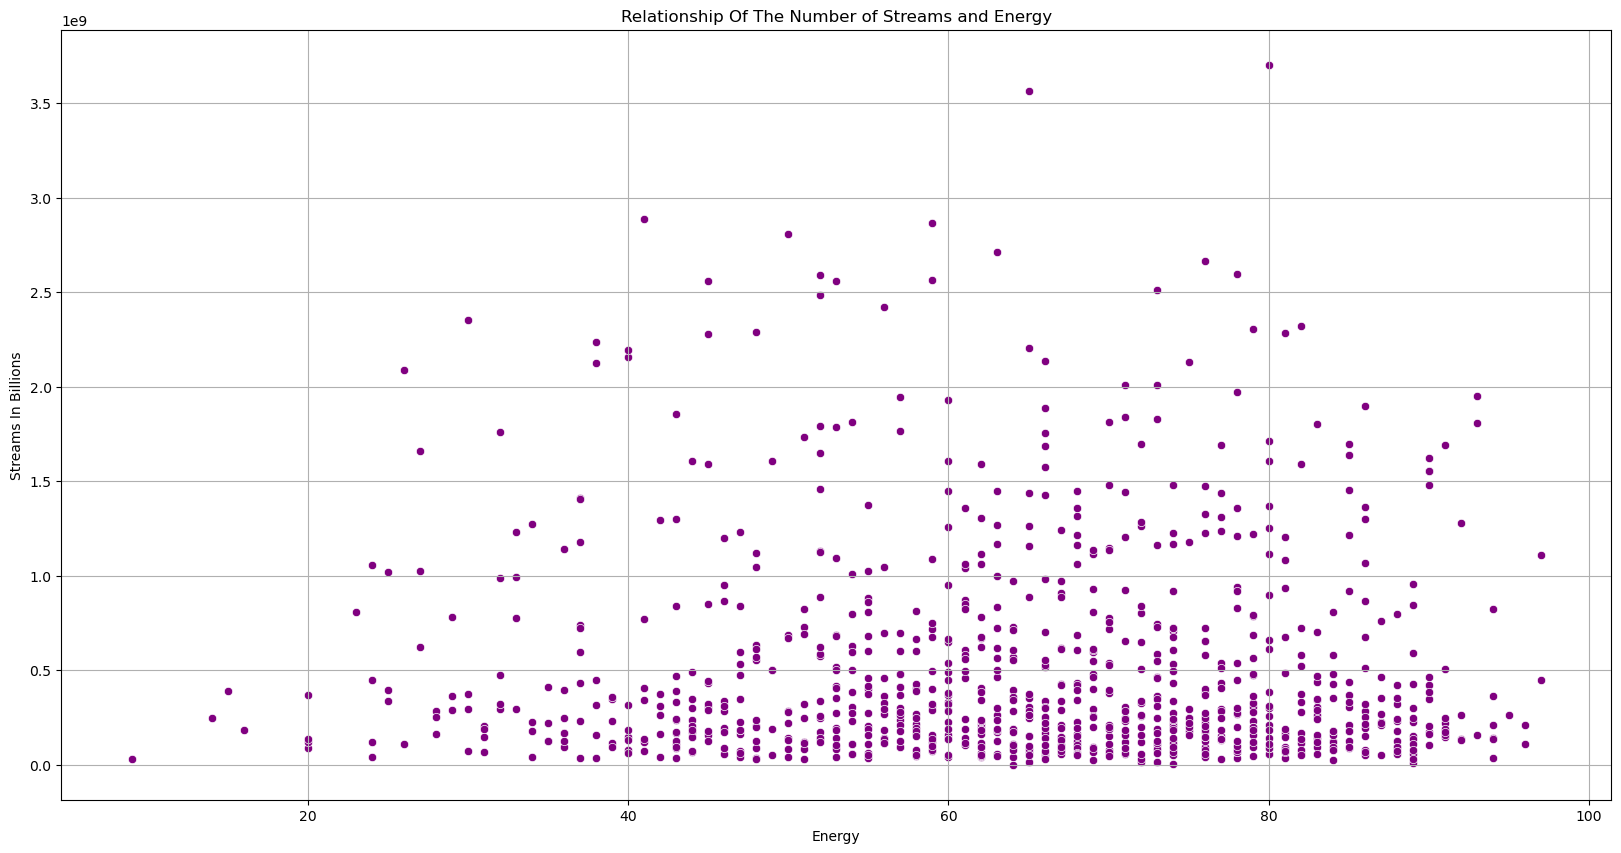

In [278]:
plt.figure(figsize=(20,10))#Adjust the size of the graph
sns.scatterplot(x='energy_%',y='streams', data = spot_data, color='purple', marker = 'o') #Generate a Line graph with the month on the x-axis
#number of tracks in the y-axis
plt.title('Relationship Of The Number of Streams and Energy') #title of the graph
plt.xlabel('Energy') #label in the x-axis
plt.ylabel('Streams In Billions') #label in the y-axis
plt.grid(True) #add a grid
plt.show() #print the graph

# correlation between danceability_% and energy_%? How about valence_% and acousticness_%

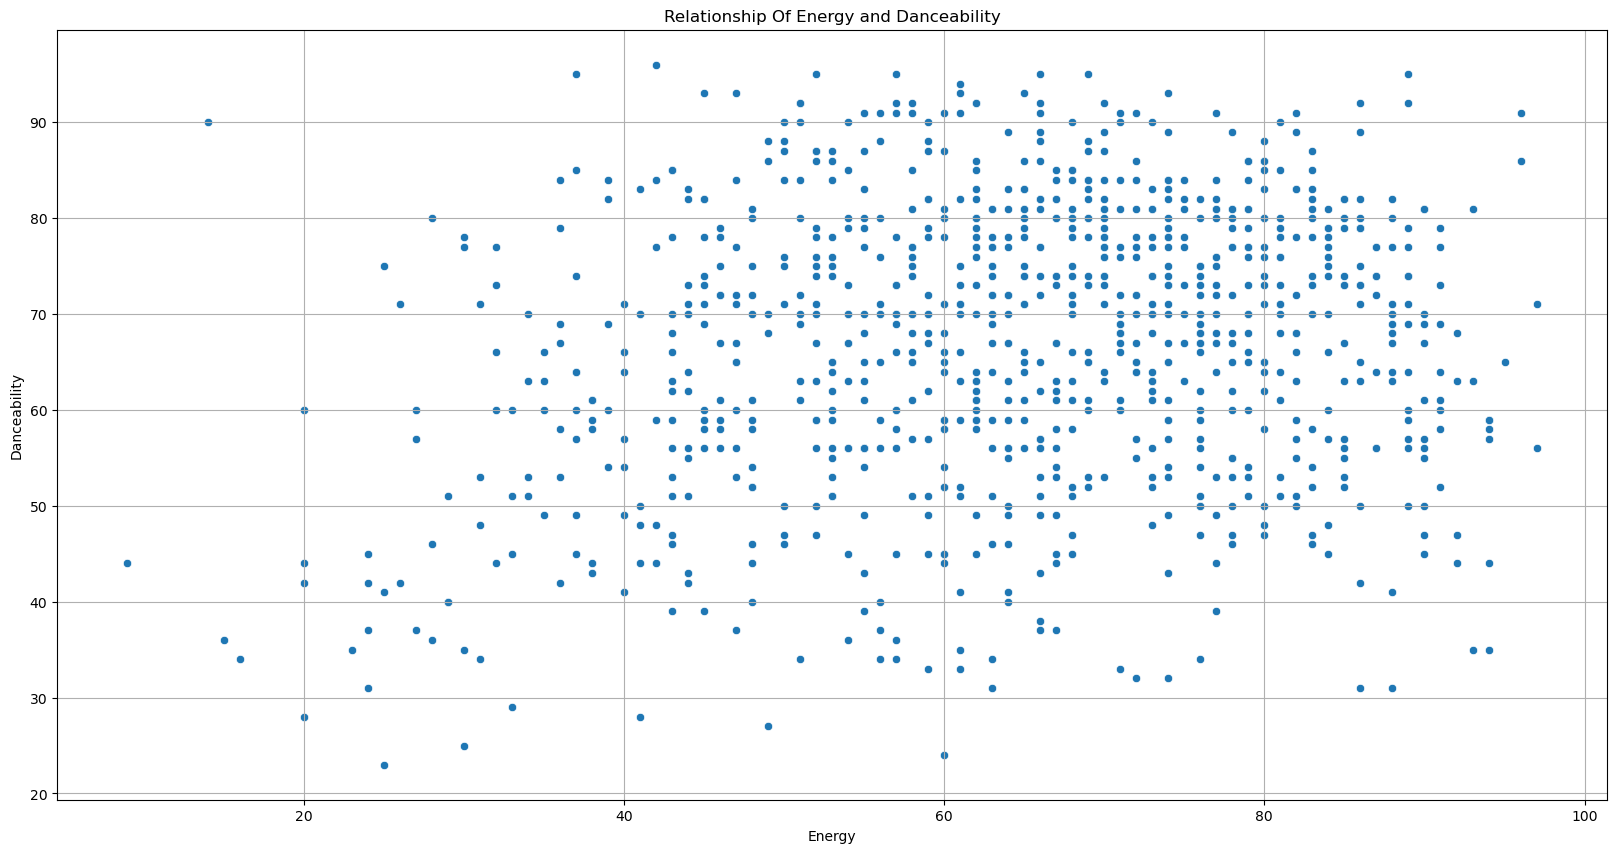

In [282]:
plt.figure(figsize=(20,10))#Adjust the size of the graph
sns.scatterplot(x='energy_%',y='danceability_%', data = spot_data, marker = 'o') #Generate a Line graph with the month on the x-axis
#number of tracks in the y-axis
plt.title('Relationship Of Energy and Danceability') #title of the graph
plt.xlabel('Energy') #label in the x-axis
plt.ylabel('Danceability') #label in the y-axis
plt.grid(True) #add a grid
plt.show() #print the graph

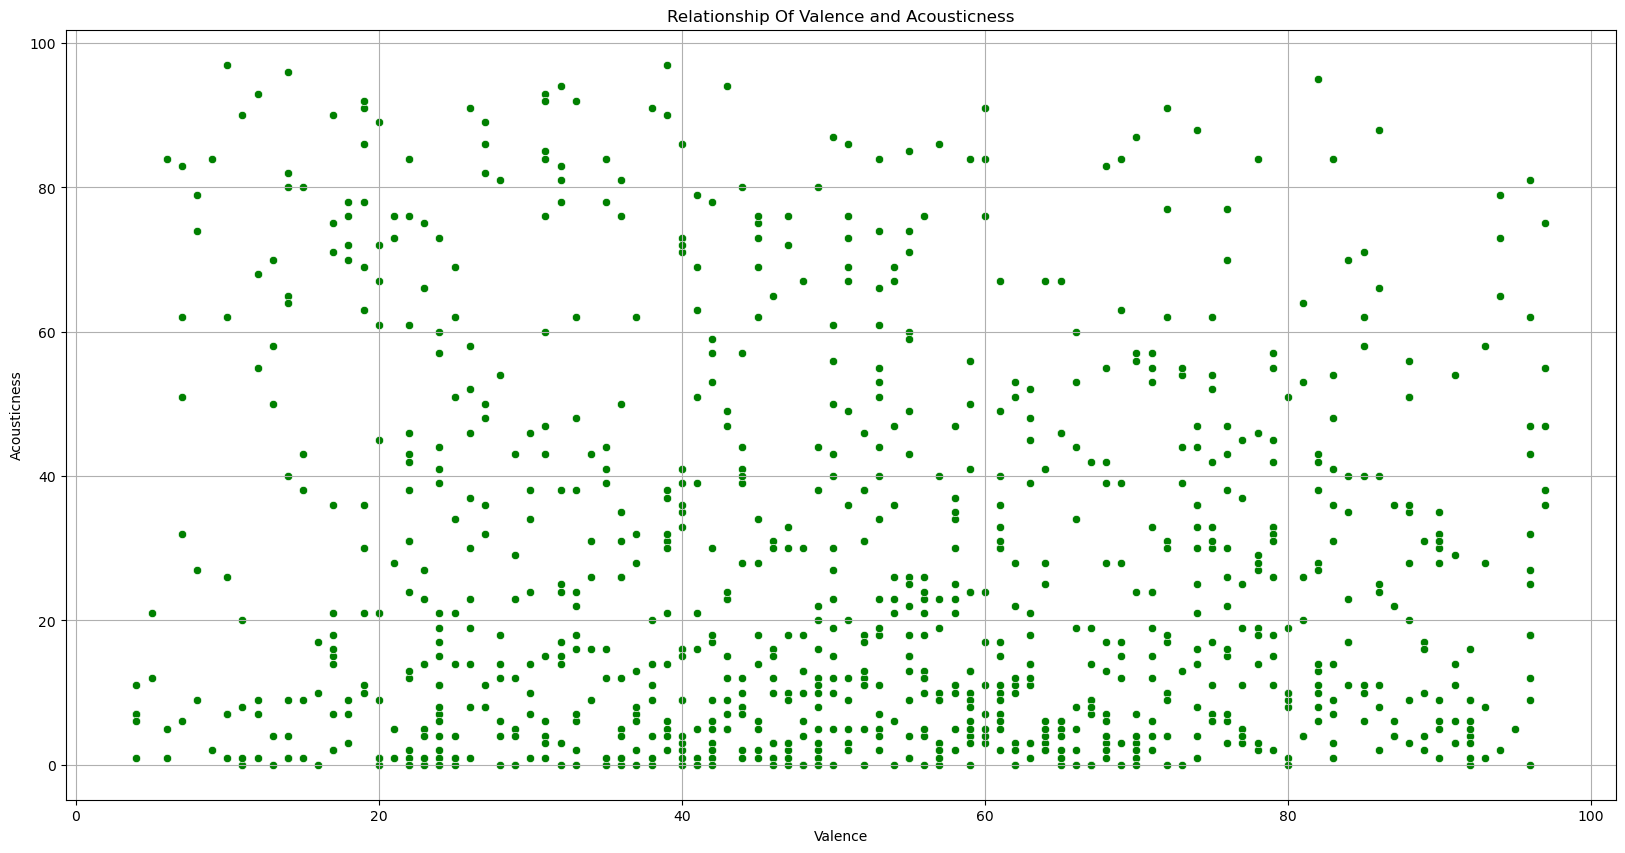

In [283]:
plt.figure(figsize=(20,10))#Adjust the size of the graph
sns.scatterplot(x='valence_%',y='acousticness_%', data = spot_data, color = 'green', marker = 'o') #Generate a Line graph with the month on the x-axis
#number of tracks in the y-axis
plt.title('Relationship Of Valence and Acousticness') #title of the graph
plt.xlabel('Valence') #label in the x-axis
plt.ylabel('Acousticness') #label in the y-axis
plt.grid(True) #add a grid
plt.show() #print the graph

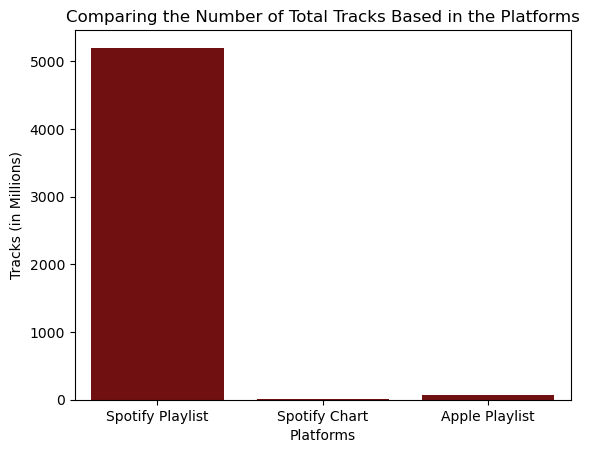

In [285]:
#Find the sums of each platform divided into 1e6 for simplification
spotify_playlist_count = spot_data['in_spotify_playlists'].mean()
spotify_chart_count = spot_data['in_spotify_charts'].mean()
apple_playlist_count = spot_data['in_apple_playlists'].mean()
#Turn this into a Dictionary
norm_data = {'Spotify Playlist' : spotify_playlist_count, 'Spotify Chart' : spotify_chart_count, 'Apple Playlist' : apple_playlist_count}
#Convert the Dictionary to a DataFrame
graph_data = pd.DataFrame(norm_data.items(), columns=['platform', 'tracks'])
#Generate the Graph for comparison
sns.barplot(x = 'platform', y = 'tracks', data = graph_data, color='maroon')
plt.title('Comparing the Number of Total Tracks Based in the Platforms')
plt.xlabel('Platforms')
plt.ylabel('Tracks (in Millions)')
plt.show()

In [286]:
x = top_five_streams[['in_spotify_playlists']].mean() #Use the Top performer's value to sum the number of tracks in the playlist
y = top_five_streams[['in_spotify_charts']].mean()
z = top_five_streams[['in_apple_playlists']].mean()
print("The mean of the Top performing Tracks that favors using the Spotify Playlist is ", x)
print("The mean of the Top performing Tracks that favors using the Spotify Chart is ", y)
print("The mean of the Top performing Tracks that favors using the Apple Playlist is ", z)

The mean of the Top performing Tracks that favors using the Spotify Playlist is  in_spotify_playlists    24236.0
dtype: float64
The mean of the Top performing Tracks that favors using the Spotify Chart is  in_spotify_charts    35.0
dtype: float64
The mean of the Top performing Tracks that favors using the Apple Playlist is  in_apple_playlists    344.333333
dtype: float64


# Advanced Analysis

In [289]:
#Sort the spot_data by streams in descending order
keys = spot_data.sort_values(by = 'streams', ascending = False)

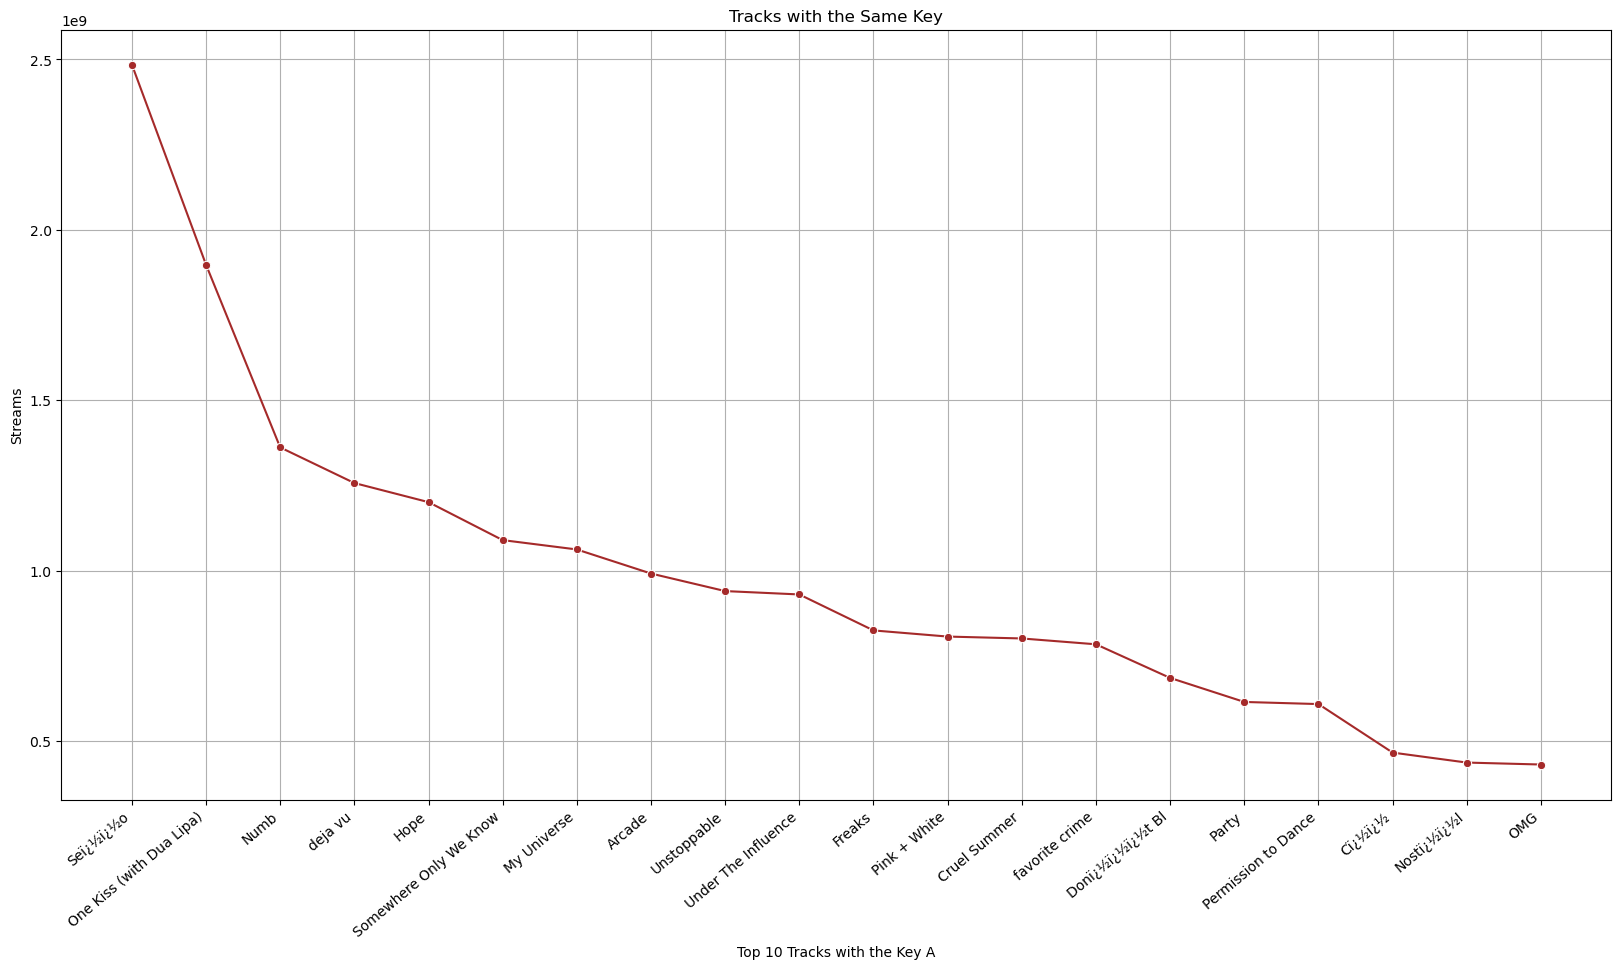

In [290]:
#Call the specific data needed
A_key_data = keys.loc[(spot_data['key'] == 'A')].head(20)
#Plot the graph
plt.figure(figsize = (20, 10))
sns.lineplot(x='track_name', y='streams', data=A_key_data, color='brown', marker='o')
plt.title('Tracks with the Same Key') #Title
plt.xlabel('Top 10 Tracks with the Key A')  #Label for track names
plt.ylabel('Streams')  #Label for stream counts
plt.grid(True)
plt.xticks(rotation=40, ha='right')
plt.show()

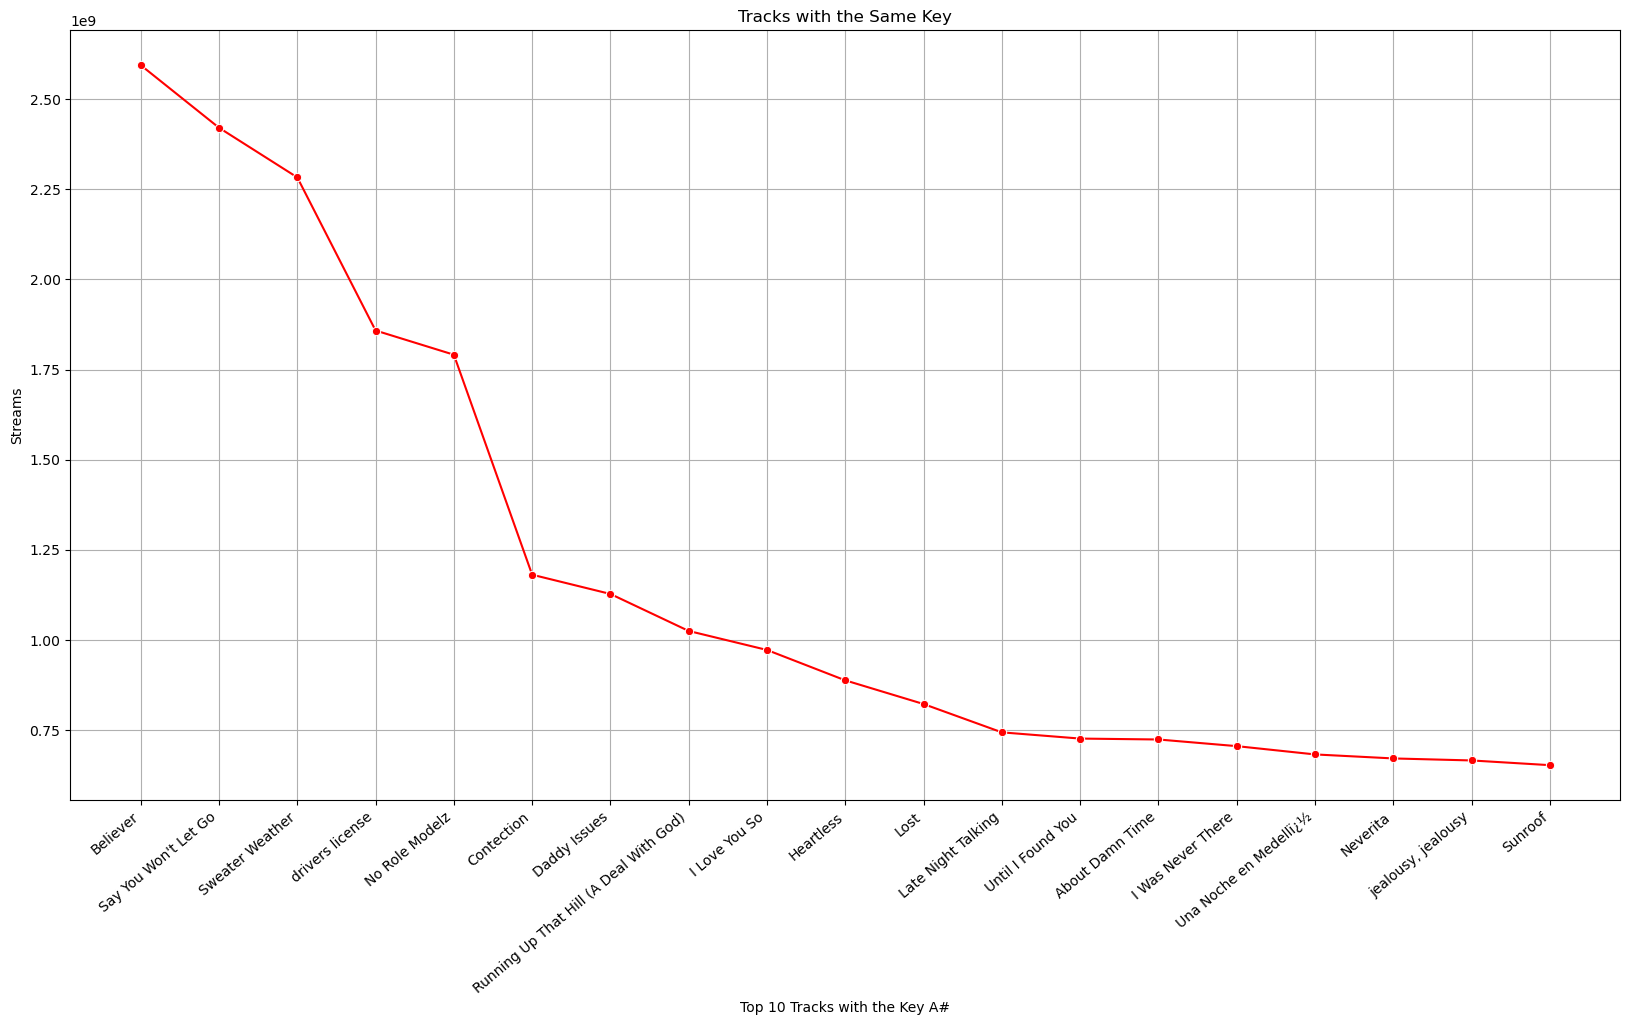

In [292]:
#Call the specific data needed
A_sharp_key_data = keys.loc[(spot_data['key'] == 'A#')].head(20)
#Plot the graph
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'track_name', y = 'streams', data = A_sharp_key_data, color ='red', marker ='o')
plt.title('Tracks with the Same Key') #Title
plt.xlabel('Top 10 Tracks with the Key A#')  #Label for track names
plt.ylabel('Streams')  #Label for stream counts
plt.grid(True)
plt.xticks(rotation=40, ha='right')
plt.show()

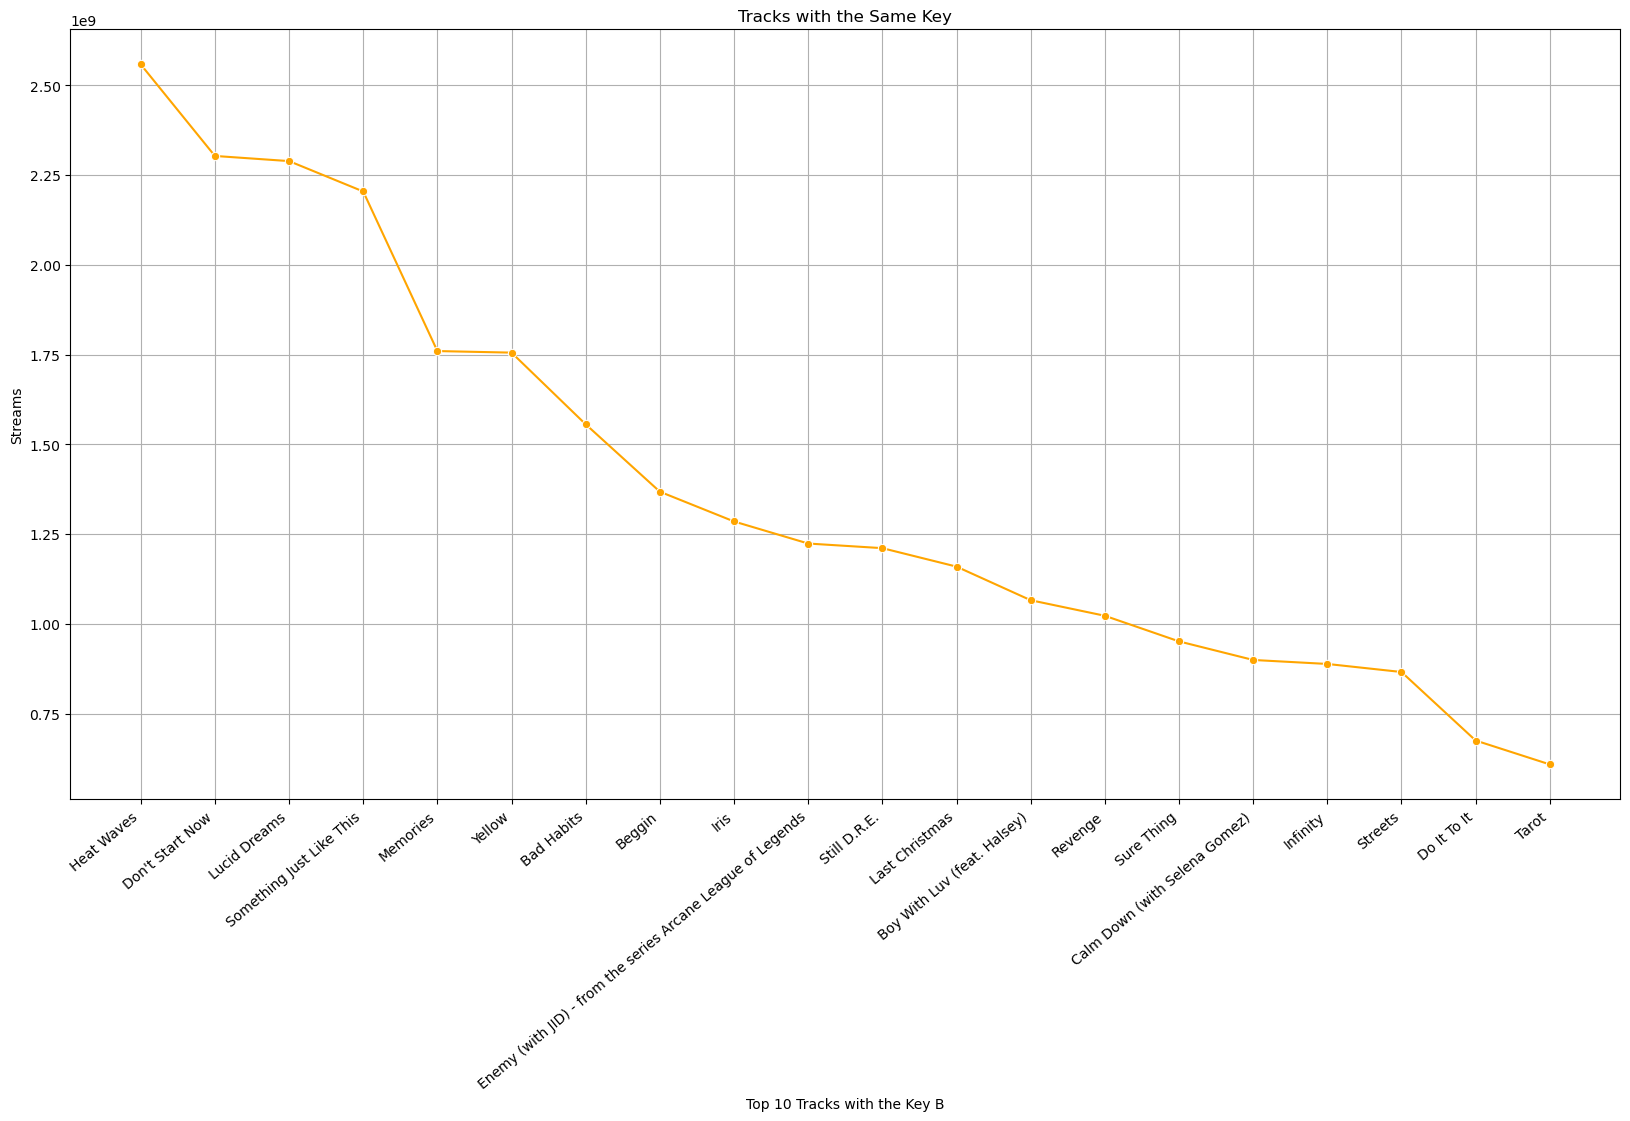

In [295]:
#Call the specific data needed
B_key_data = keys.loc[(spot_data['key'] == 'B')].head(20)
#Plot the graph
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'track_name', y = 'streams', data = B_key_data, color ='orange', marker ='o')
plt.title('Tracks with the Same Key') #Title
plt.xlabel('Top 10 Tracks with the Key B')  #Label for track names
plt.ylabel('Streams')  #Label for stream counts
plt.grid(True)
plt.xticks(rotation=40, ha='right')
plt.show()

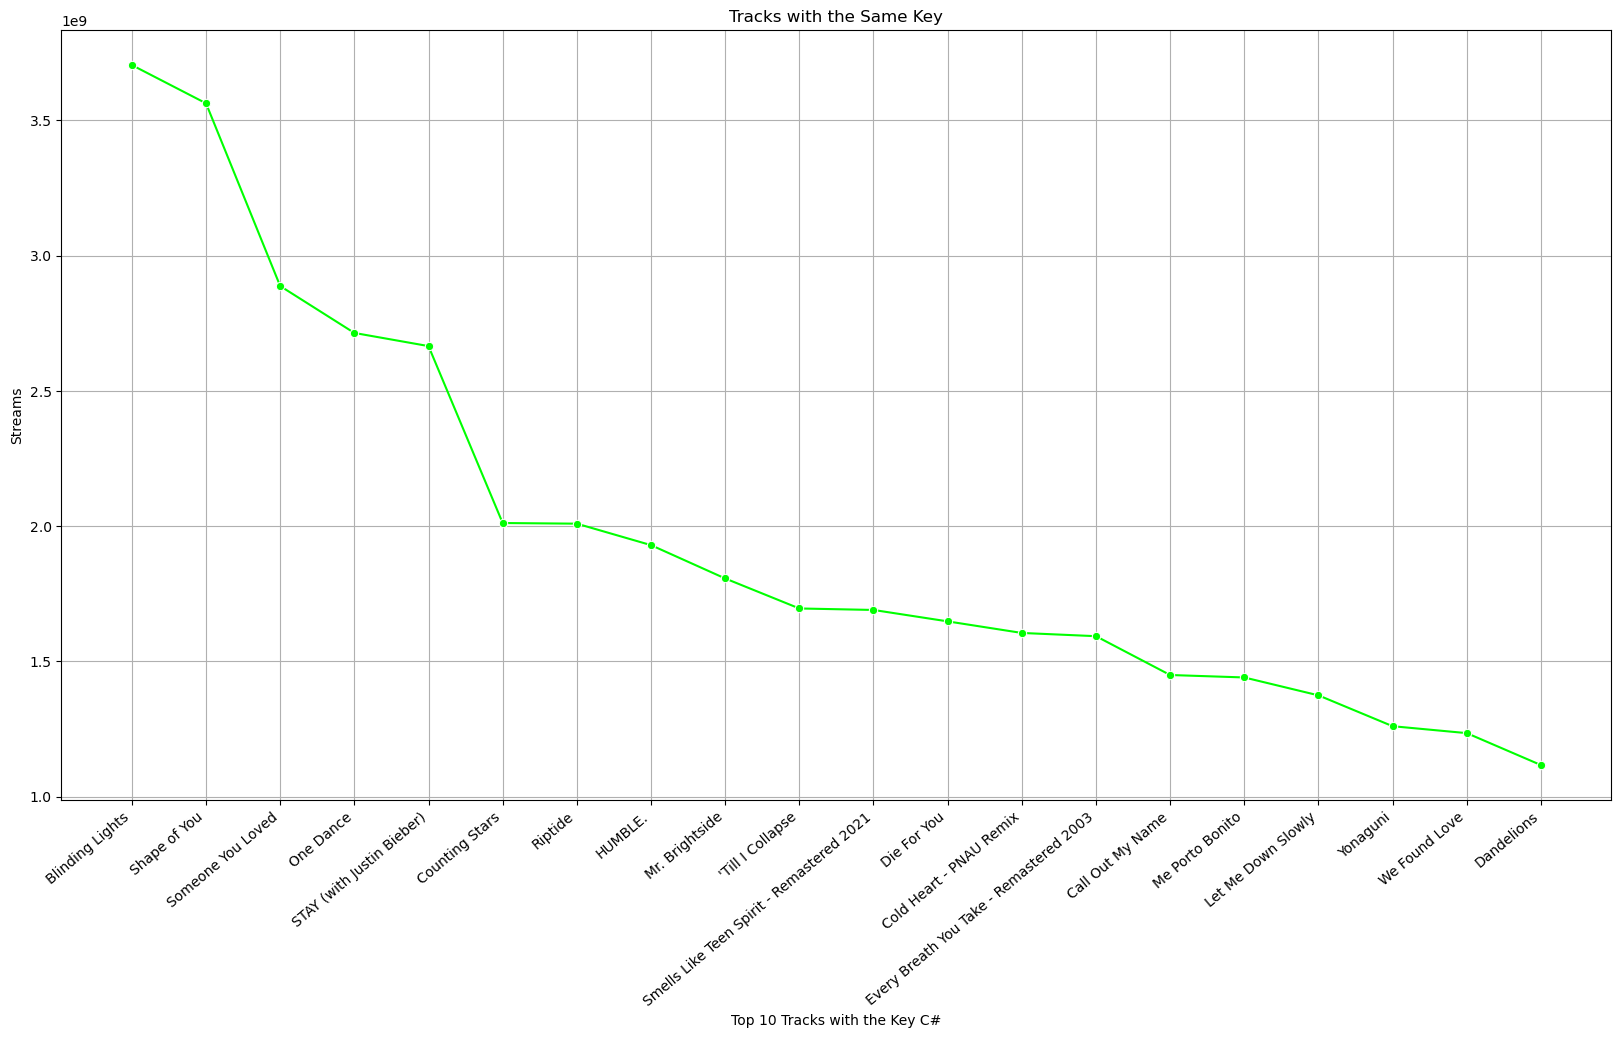

In [297]:
#Call the specific data needed
C_sharp_key_data = keys.loc[(spot_data['key'] == 'C#')].head(20)
#Plot the graph
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'track_name', y = 'streams', data = C_sharp_key_data, color ='lime', marker ='o')
plt.title('Tracks with the Same Key') #Title
plt.xlabel('Top 10 Tracks with the Key C#')  #Label for track names
plt.ylabel('Streams')  #Label for stream counts
plt.grid(True)
plt.xticks(rotation=40, ha='right')
plt.show()

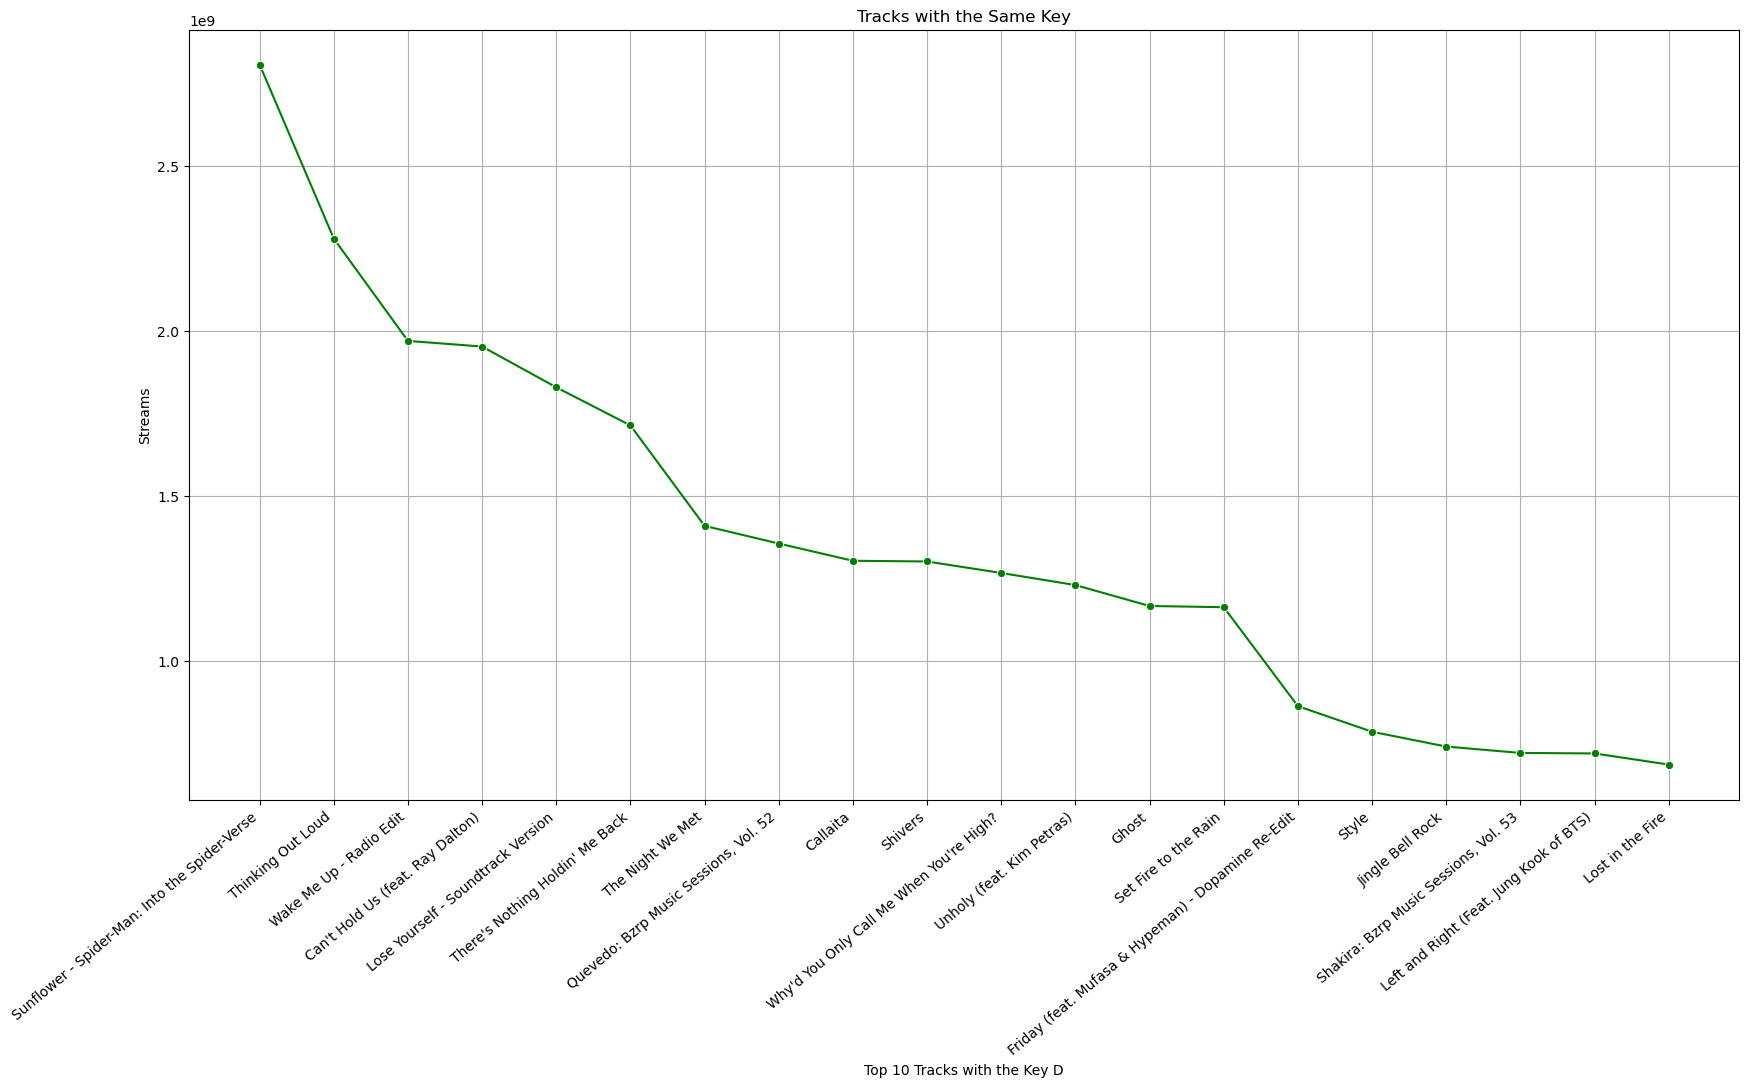

In [298]:
#Call the specific data needed
D_key_data = keys.loc[(spot_data['key'] == 'D')].head(20)
#Plot the graph
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'track_name', y = 'streams', data = D_key_data, color ='green', marker ='o')
plt.title('Tracks with the Same Key') #Title
plt.xlabel('Top 10 Tracks with the Key D')  #Label for track names
plt.ylabel('Streams')  #Label for stream counts
plt.grid(True)
plt.xticks(rotation=40, ha='right')
plt.show()

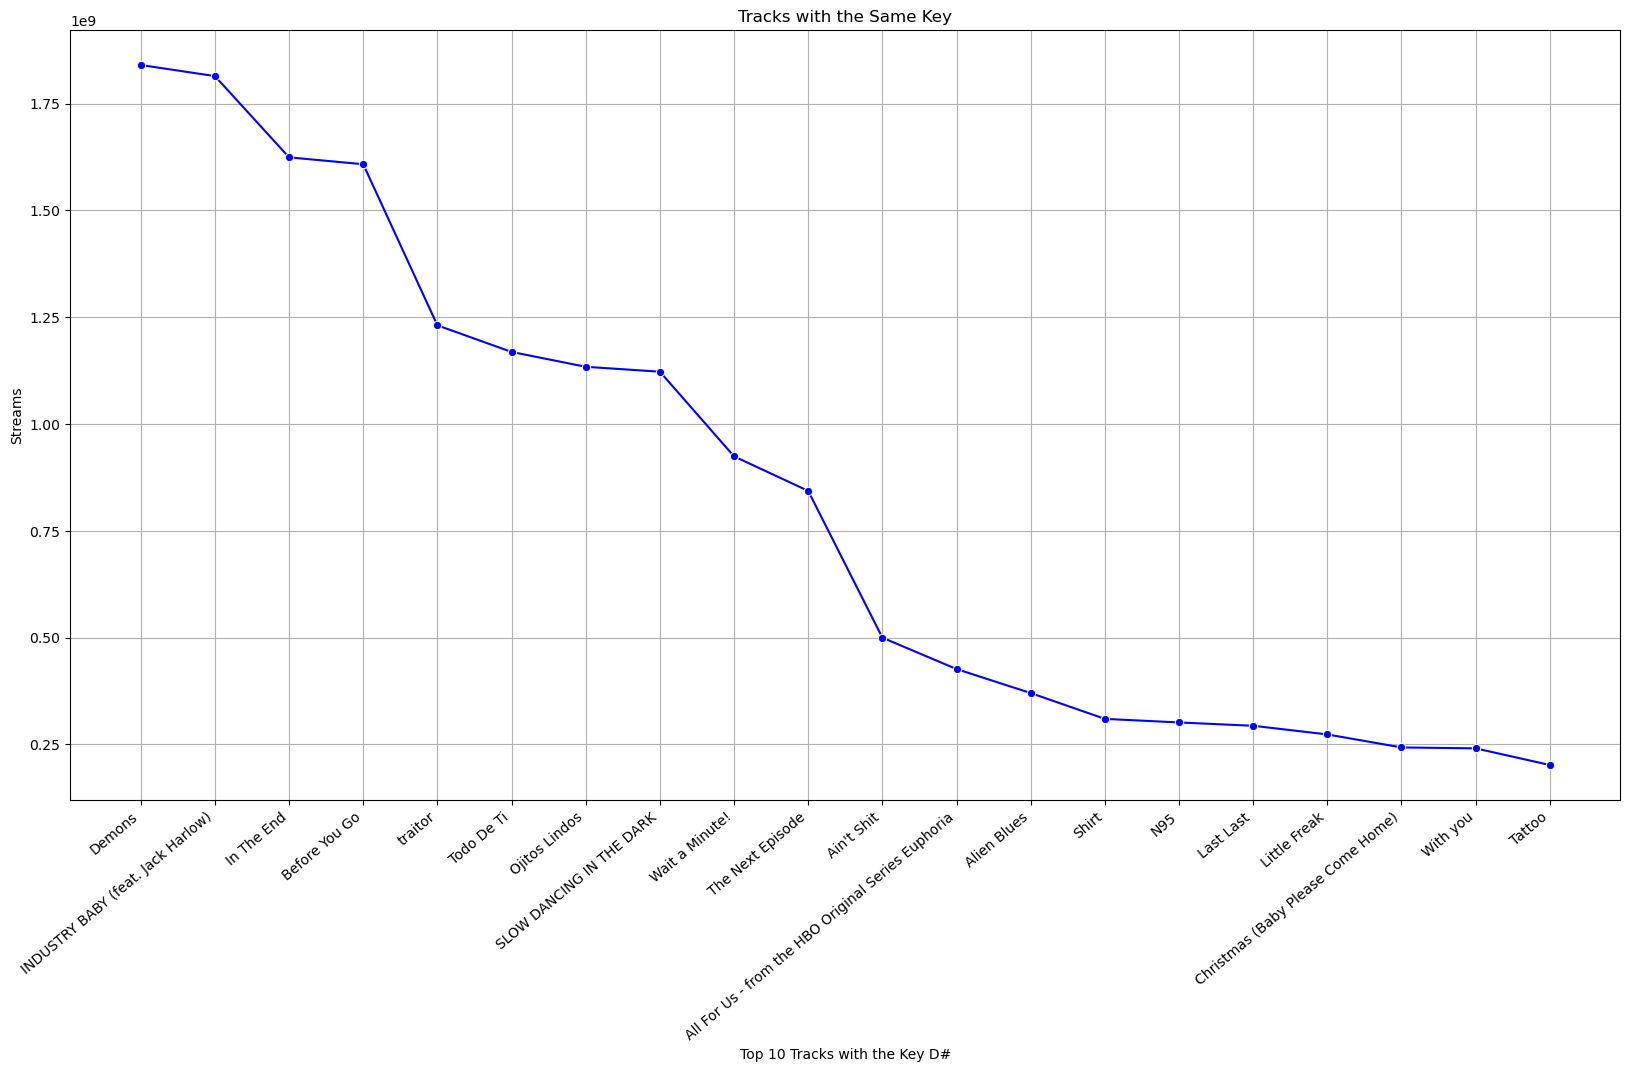

In [299]:
#Call the specific data needed
D_sharp_key_data = keys.loc[(spot_data['key'] == 'D#')].head(20)
#Plot the graph
plt.figure(figsize = (20, 10))
sns.lineplot(x = 'track_name', y = 'streams', data = D_sharp_key_data, color ='blue', marker ='o')
plt.title('Tracks with the Same Key') #Title
plt.xlabel('Top 10 Tracks with the Key D#')  #Label for track names
plt.ylabel('Streams')  #Label for stream counts
plt.grid(True)
plt.xticks(rotation=40, ha='right')
plt.show()

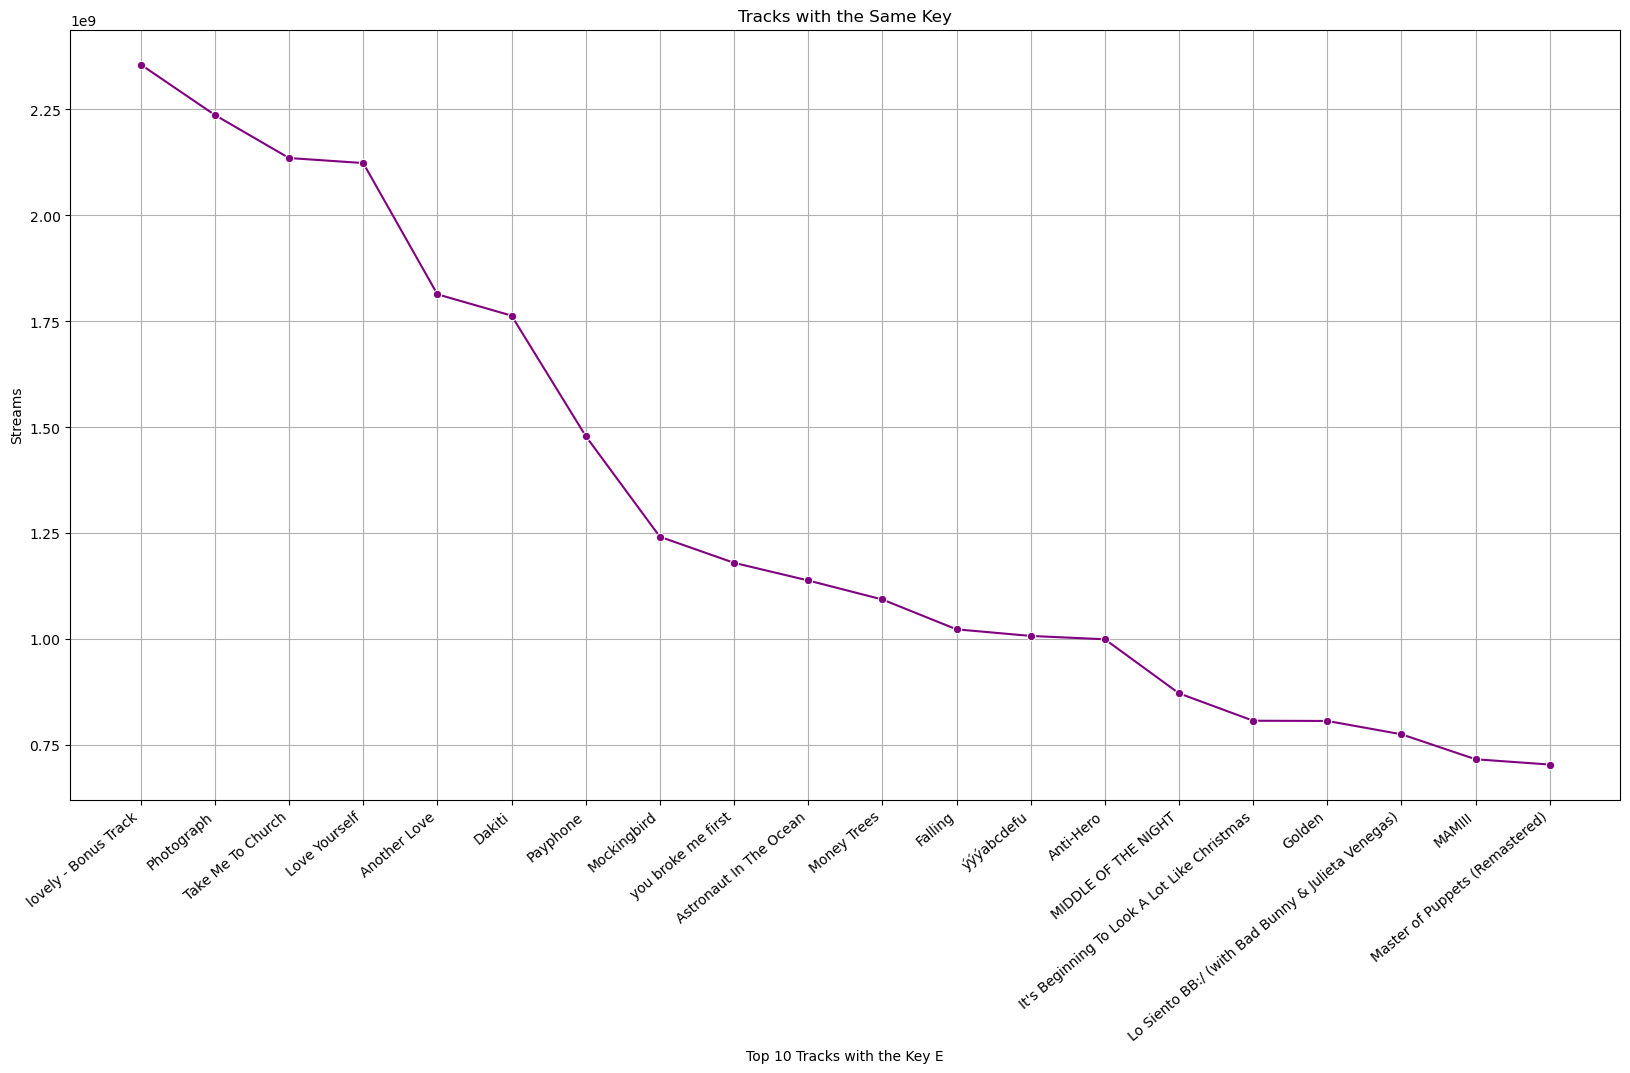

In [301]:
#Call the specific data needed
E_key_data = keys.loc[(spot_data['key'] == 'E')].head(20)
#Plot the graph
plt.figure(figsize = (20, 10))
sns.lineplot(x='track_name', y='streams', data=E_key_data, color='purple', marker='o')
plt.title('Tracks with the Same Key') #Title
plt.xlabel('Top 10 Tracks with the Key E')  #Label for track names
plt.ylabel('Streams')  #Label for stream counts
plt.grid(True)
plt.xticks(rotation=40, ha='right')
plt.show()

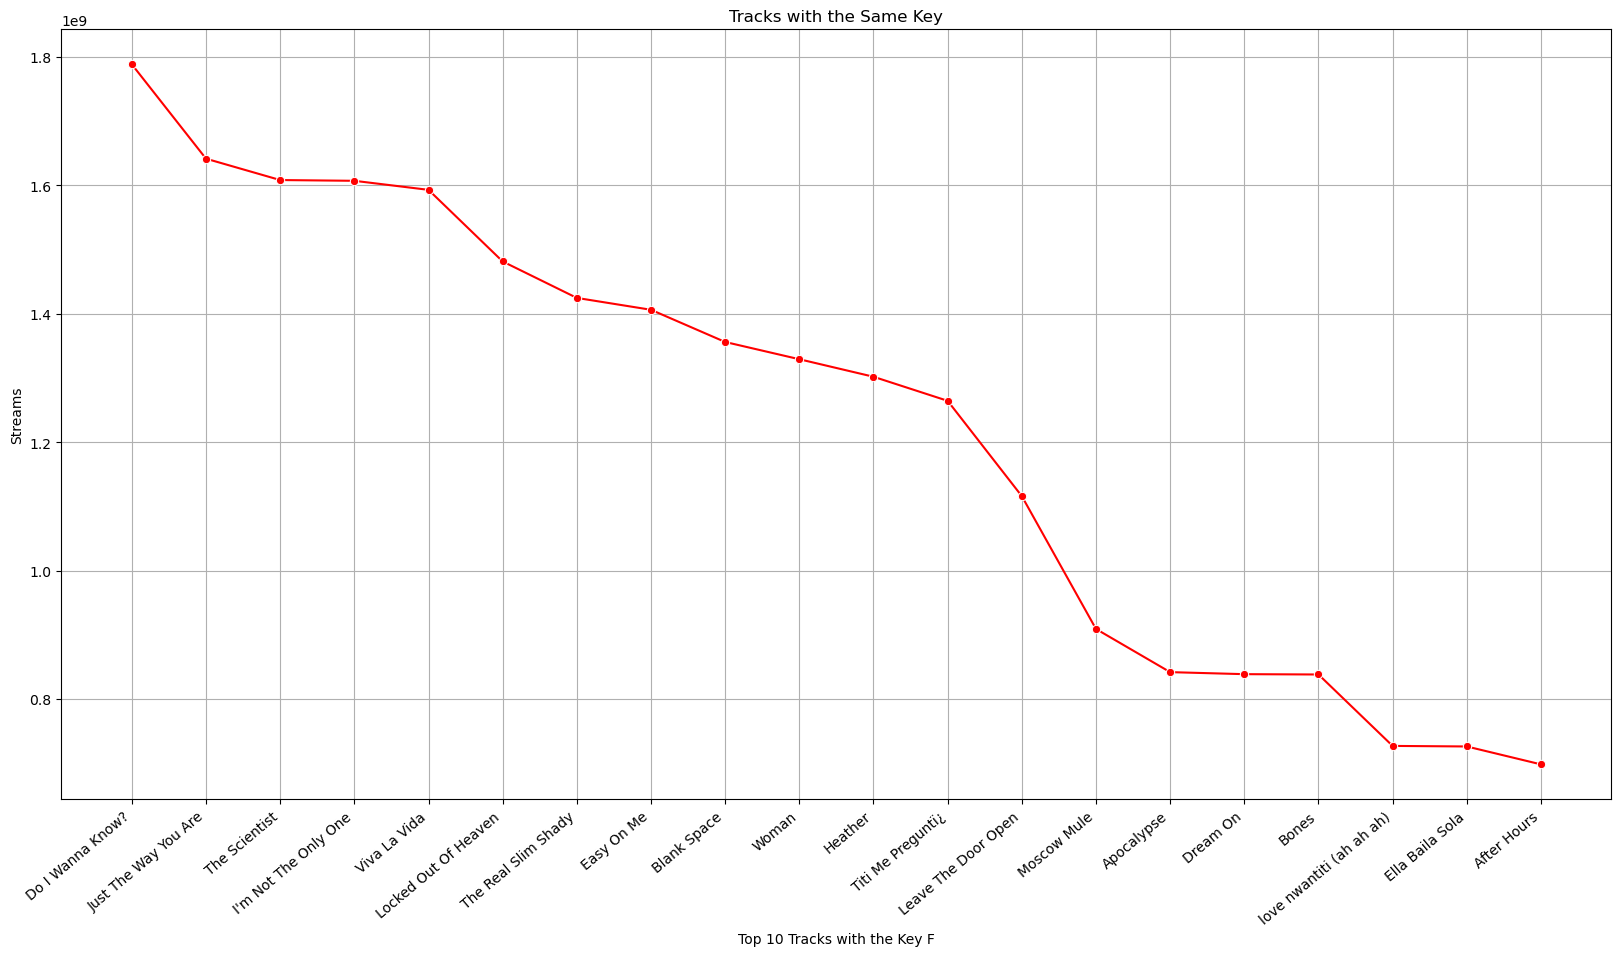

In [302]:
#Call the specific data needed
F_key_data = keys.loc[(spot_data['key'] == 'F')].head(20)
#Plot the graph
plt.figure(figsize = (20, 10))
sns.lineplot(x='track_name', y='streams', data=F_key_data, color='red', marker='o')
plt.title('Tracks with the Same Key') #Title
plt.xlabel('Top 10 Tracks with the Key F')  #Label for track names
plt.ylabel('Streams')  #Label for stream counts
plt.grid(True)
plt.xticks(rotation=40, ha='right')
plt.show()

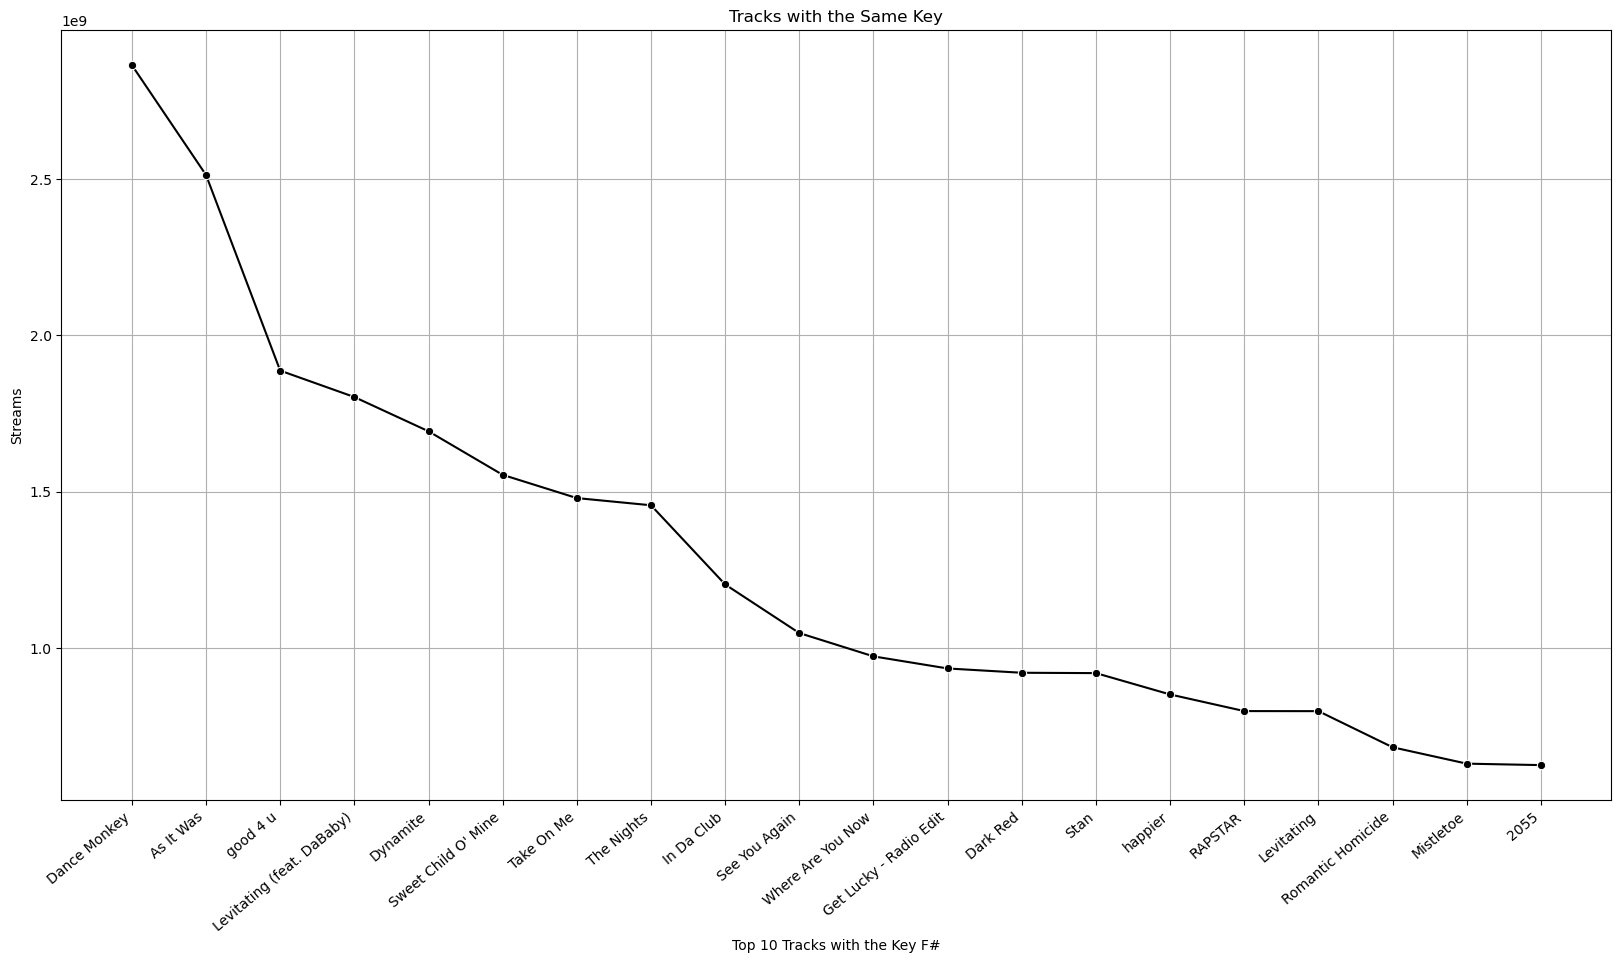

In [303]:
#Call the specific data needed
F_sharp_key_data = keys.loc[(spot_data['key'] == 'F#')].head(20)
#Plot the graph
plt.figure(figsize = (20, 10))
sns.lineplot(x='track_name', y='streams', data=F_sharp_key_data, color='black', marker='o')
plt.title('Tracks with the Same Key') #Title
plt.xlabel('Top 10 Tracks with the Key F#')  #Label for track names
plt.ylabel('Streams')  #Label for stream counts
plt.grid(True)
plt.xticks(rotation=40, ha='right')
plt.show()

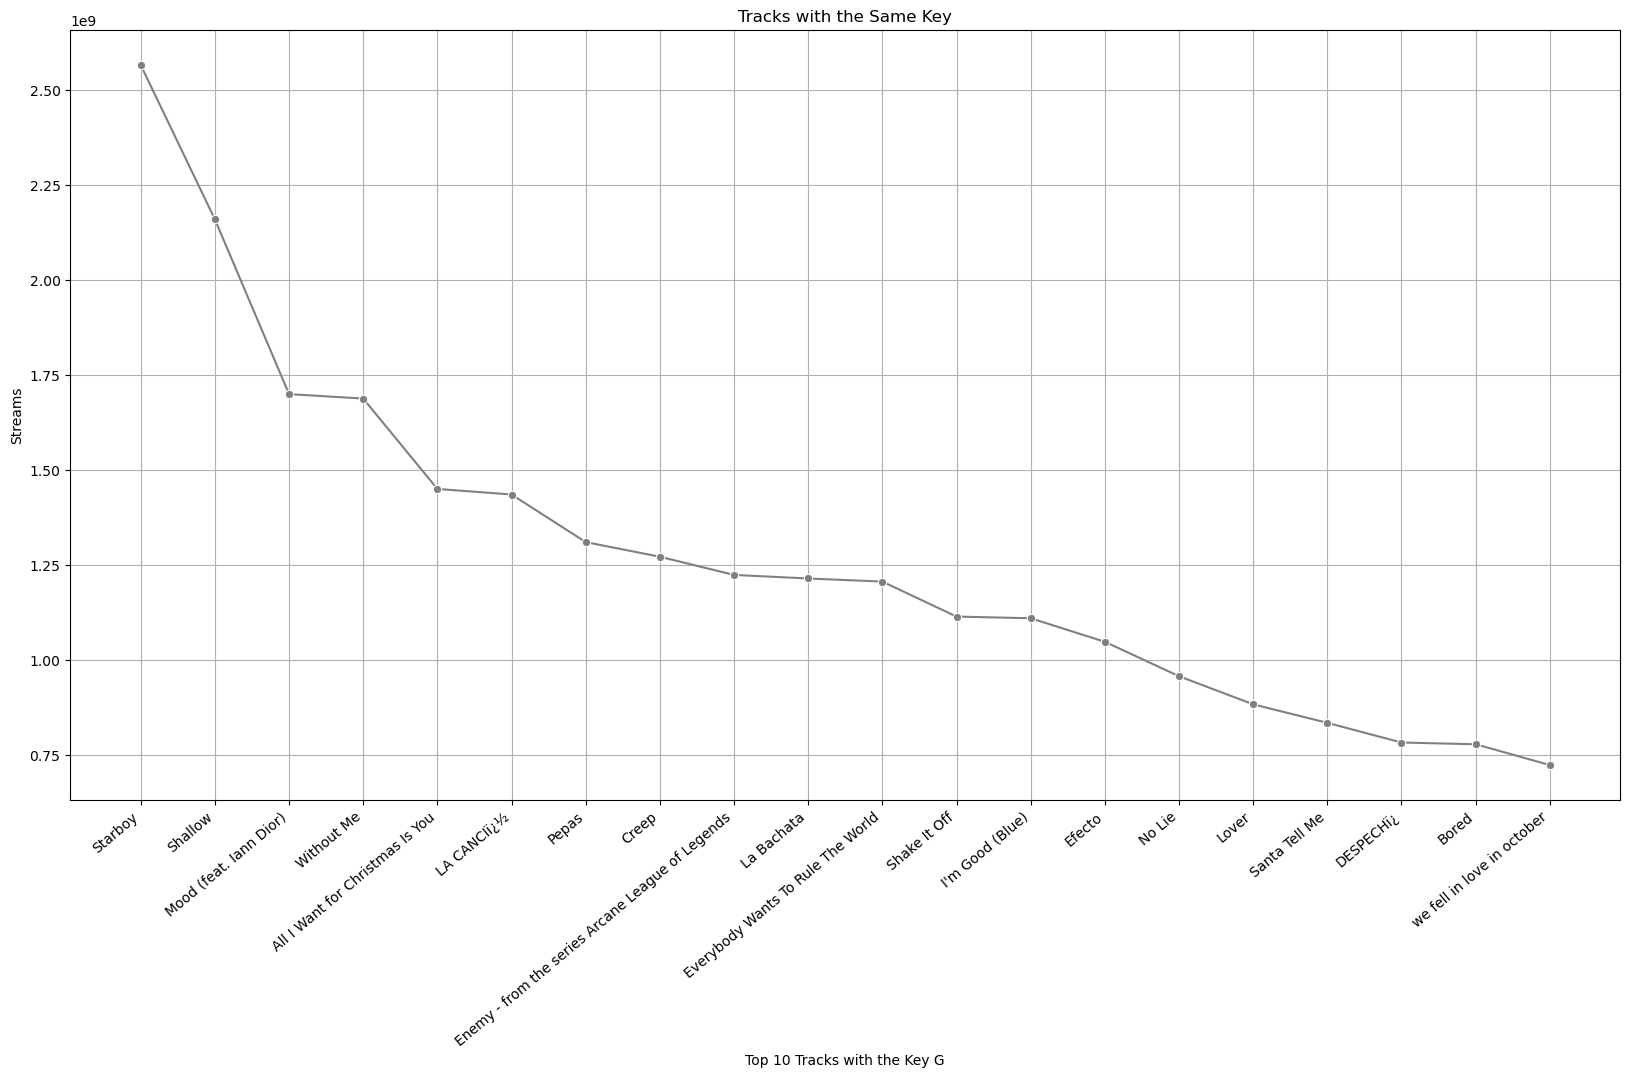

In [305]:
#Call the specific data needed
G_key_data = keys.loc[(spot_data['key'] == 'G')].head(20)
#Plot the graph
plt.figure(figsize = (20, 10))
sns.lineplot(x='track_name', y='streams', data=G_key_data, color='gray', marker='o')
plt.title('Tracks with the Same Key') #Title
plt.xlabel('Top 10 Tracks with the Key G')  #Label for track names
plt.ylabel('Streams')  #Label for stream counts
plt.grid(True)
plt.xticks(rotation=40, ha='right')
plt.show()

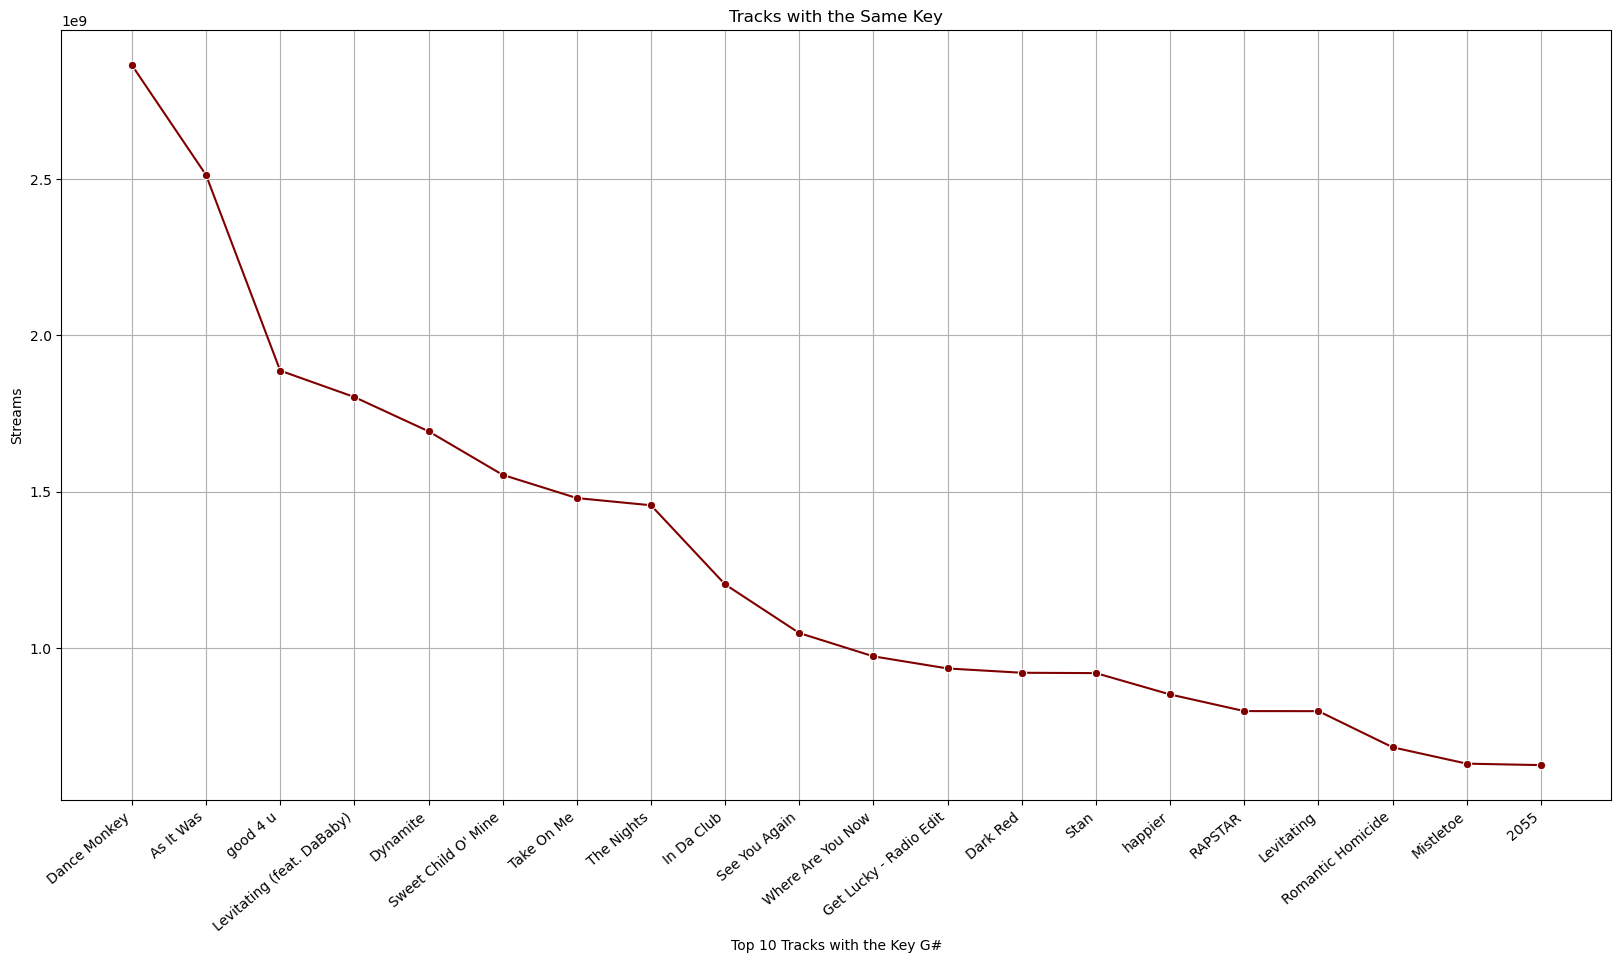

In [306]:
#Call the specific data needed
G_sharp_key_data = keys.loc[(spot_data['key'] == 'F#')].head(20)
#Plot the graph
plt.figure(figsize = (20, 10))
sns.lineplot(x='track_name', y='streams', data=G_sharp_key_data, color='maroon', marker='o')
plt.title('Tracks with the Same Key') #Title
plt.xlabel('Top 10 Tracks with the Key G#')  #Label for track names
plt.ylabel('Streams')  #Label for stream counts
plt.grid(True)
plt.xticks(rotation=40, ha='right')
plt.show()

The average on each key is:  key
A     4.088414e+08
A#    5.524754e+08
B     5.193480e+08
C#    6.042802e+08
D     5.295256e+08
D#    5.530365e+08
E     5.774972e+08
F     4.684464e+08
F#    5.223632e+08
G     4.525994e+08
G#    4.769119e+08
Name: streams, dtype: float64


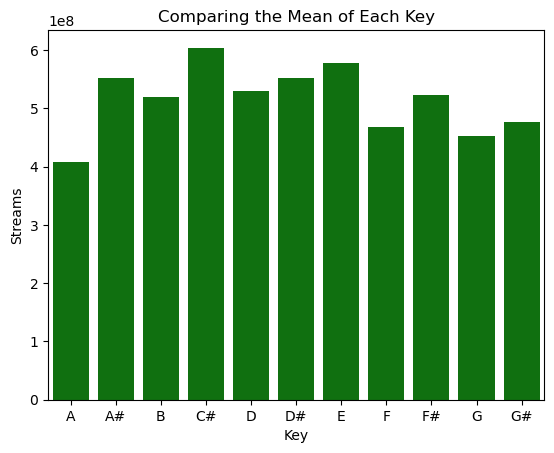

In [307]:
#find the means for each key
key_data = spot_data.groupby('key')['streams'].mean()
#Print the Means
print ('The average on each key is: ', key_data)
#converte data to dictionary
key_dict_data = key_data.to_dict()
#convert Dictionary to DataFrame
key_graph_data= pd.DataFrame(key_dict_data.items(), columns=['key', 'streams'])
#Create the graph
sns.barplot(x = 'key', y = 'streams', data = key_graph_data, color = 'green')
plt.title('Comparing the Mean of Each Key')
plt.xlabel('Key')
plt.ylabel('Streams')
plt.show()

Mean of Major mode:  534832793.33515483
Mean of Minor mode:  485944478.91067


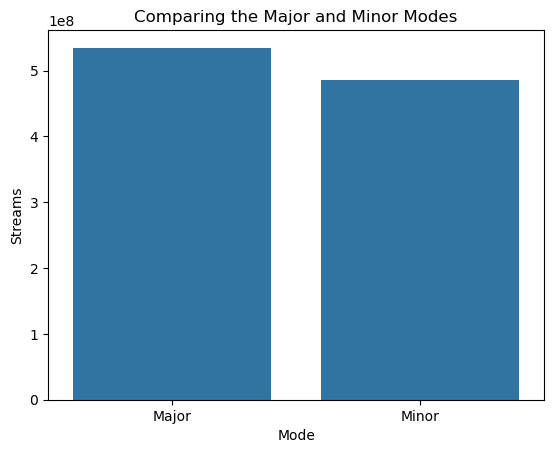

In [309]:
#Find the mean for Major and Minor Mods
major_data = spot_data[spot_data['mode'] == 'Major']['streams'].mean()
minor_data= spot_data[spot_data['mode'] == 'Minor']['streams'].mean()
#Print the means
print('Mean of Major mode: ', major_data)
print('Mean of Minor mode: ', minor_data)
#Convert it into a dictionary
mode_data = {'Major' : major_data, 'Minor' : minor_data}
#Convert the Dictionary to DataFrame
mode_graph_data = pd.DataFrame(mode_data.items(), columns=['mode', 'streams'])
#Create the Graph
sns.barplot(x = 'mode', y = 'streams', data = mode_graph_data)
plt.title('Comparing the Major and Minor Modes')
plt.xlabel('Mode')
plt.ylabel('Streams')
plt.show()

The Top 5 Appearances in the Spotify Playlist are:  artist(s)_name
Pharrell Williams, Nile Rodgers, Daft Punk    52898.000000
The Killers                                   51979.000000
a-ha                                          44927.000000
Drake, WizKid, Kyla                           43257.000000
Gotye, Kimbra                                 42798.000000
Tears For Fears                               41751.000000
Guns N' Roses                                 41231.000000
Queen                                         40112.000000
Rihanna, Calvin Harris                        36843.000000
Radiohead                                     36724.000000
Avicii                                        34120.500000
Dr. Dre, Snoop Dogg                           32864.000000
Chris Molitor                                 31358.000000
Vance Joy                                     31123.000000
50 Cent                                       30427.000000
Nirvana                                       29

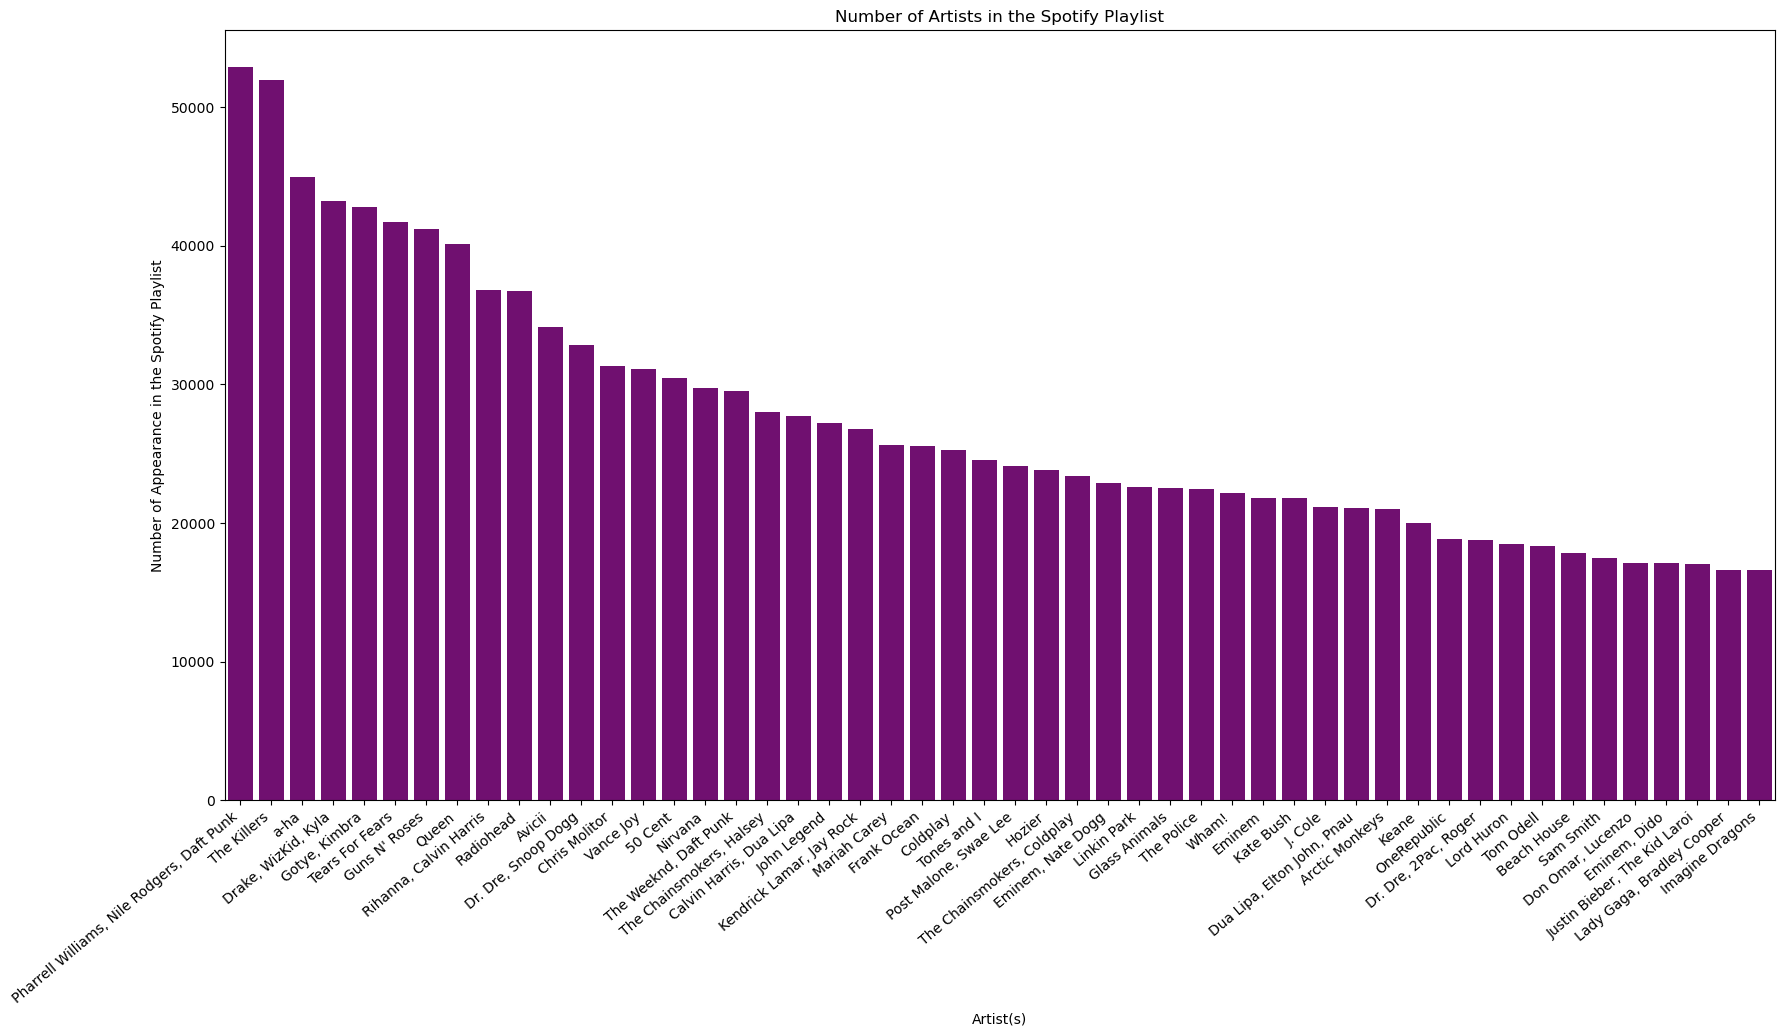

In [329]:
#Find the mean for the the artists that appeared in the spotify playlist, sort and find the highest values in the list
group_playlist = spot_data.groupby('artist(s)_name')['in_spotify_playlists'].mean().sort_values().tail(50).iloc[::-1]
print("The Top 5 Appearances in the Spotify Playlist are: ", group_playlist)
#Convert list to Dictionary
group_playlist_dict = group_playlist.to_dict()
#Convert Dictionary to DataFrame
group_playlist_graph = pd.DataFrame(group_playlist_dict.items(), columns=['artist', 'playlist'])
#Generate the Figure
plt.figure(figsize=(20,10))
sns.barplot(x = 'artist', y = 'playlist', data = group_playlist_graph, color = 'purple')
plt.title('Number of Artists in the Spotify Playlist')
plt.xlabel('Artist(s)')
plt.ylabel('Number of Appearance in the Spotify Playlist')
plt.xticks(rotation=40, ha='right')
plt.show()

The Top 5 Appearances in the Spotify Charts are:  artist(s)_name
Latto, Jung Kook                          147.0
Dave, Central Cee                          91.0
The Weeknd, 21 Savage, Metro Boomin        88.0
The Weeknd, Madonna, Playboi Carti         87.0
Gunna                                      83.0
Tom Odell                                  83.0
Nicki Minaj, Aqua, Ice Spice               80.0
Bebe Rexha, David Guetta                   80.0
The Weeknd, Daft Punk                      79.0
Post Malone, Swae Lee                      78.0
Rï¿½ï¿½ma, Selena G                        77.0
Miley Cyrus                                67.0
David Guetta, Anne-Marie, Coi Leray        66.0
Tyler, The Creator, Kali Uchis             64.0
Glass Animals                              63.0
OneRepublic                                59.5
Peggy Gou                                  59.0
Loreen                                     59.0
Future, Metro Boomin, Don Toliver          58.0
Libianca               

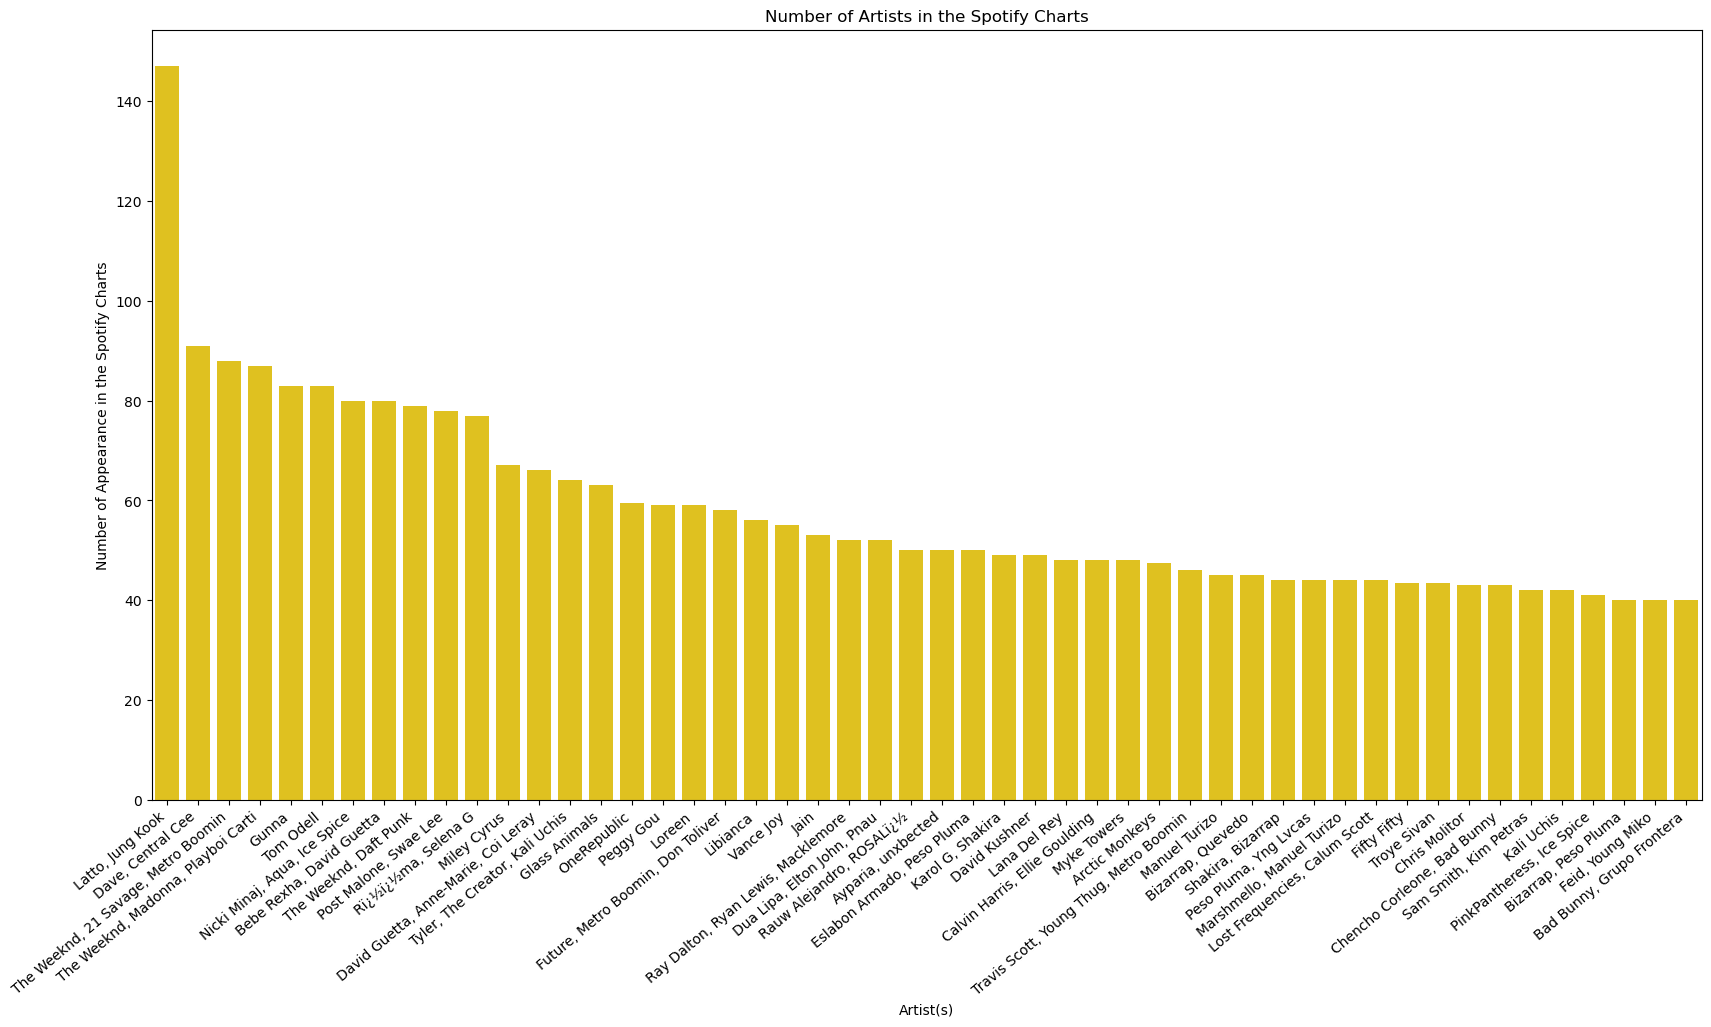

In [327]:
#Find the mean for the the artists that appeared in the spotify charts, sort the values and find the 5 highest artists
group_charts = spot_data.groupby('artist(s)_name')['in_spotify_charts'].mean().sort_values().tail(50).iloc[::-1]
print("The Top 5 Appearances in the Spotify Charts are: ", group_charts)
#Convert list to Dictionary
group_charts_dict = group_charts.to_dict()
#Convert Dictionary to DataFrame
group_charts_graph = pd.DataFrame(group_charts_dict.items(), columns=['artist', 'charts'])
#Generate the Figure
plt.figure(figsize=(20,10))
sns.barplot(x = 'artist', y = 'charts', data = group_charts_graph, color = 'gold')
plt.title('Number of Artists in the Spotify Charts')
plt.xlabel('Artist(s)')
plt.ylabel('Number of Appearance in the Spotify Charts')
plt.xticks(rotation=40, ha='right')
plt.show()